# Census Income
Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. 
These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

Dataset Link-
https://github.com/dsrscientist/dataset1/blob/master/census_income.csv 


In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import zipfile
warnings.filterwarnings('ignore')


In [2]:
#Retrieving Dataset
url="https://raw.githubusercontent.com/dsrscientist/dataset1/refs/heads/master/census_income.csv"
df=pd.read_csv(url)
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
#Exploratory Analysis
df.shape

(32560, 15)

In [4]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [6]:
#Data Type observation
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


There are two types of data (int64 and object ) present in the dataset.

Object(string): Workclass, Education, Marital_status, Occupation, Relationship, Race, Sex, Native_country, and Income

int64: Age, Fnlwgt, Education_num, Capital_gain, Capital_loss, Hours_per_week

The dataset NO presents null values.


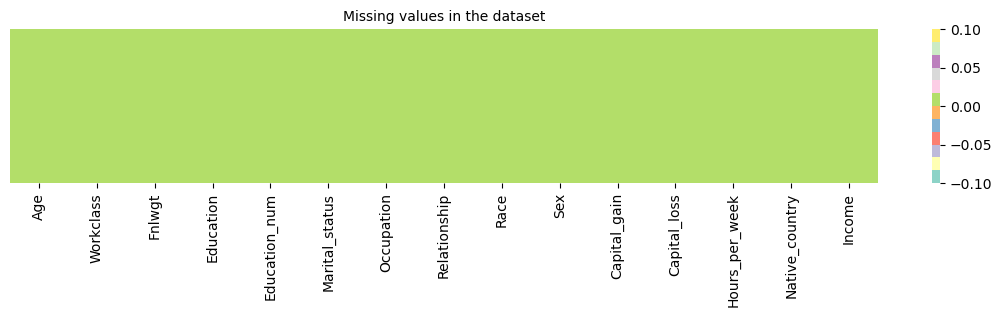

In [8]:
# Let's visualize it using heatmap for dataset
plt.figure(figsize=(14,2))
sns.heatmap(df.isnull(), yticklabels=False, cmap='Set3')
plt.title('Missing values in the dataset', fontsize=10);

We can see that there are no missing values in the dataset.

In [9]:
#Feature Analysis
#Unique Value Analysis
info_df=df.nunique().to_frame('Unique Values')
info_df

,Unique Values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


About the number of unique values in the datasets:

The dataset contains the following categorical variables: Workclass(9), Education(16), Marital_status(7), Occupation(15), Relationship(6), Race(5), Sex(2), Native_country(42), Income(2) with its respective unique values.

The numerical columns in the dataset are: Age, Fnlwgt, Education_num, Capital_gain, Capital_loss, and Hours_per_week.

However, the numerical columns but Fnlwgt are discrete and have a small number of unique values. They could be analyzed as categorical during EDA.

In [10]:
#Income Target Variable
# Checking the target variable
df['Income'].value_counts().to_frame()

,count
Income,
<=50K,24719
>50K,7841


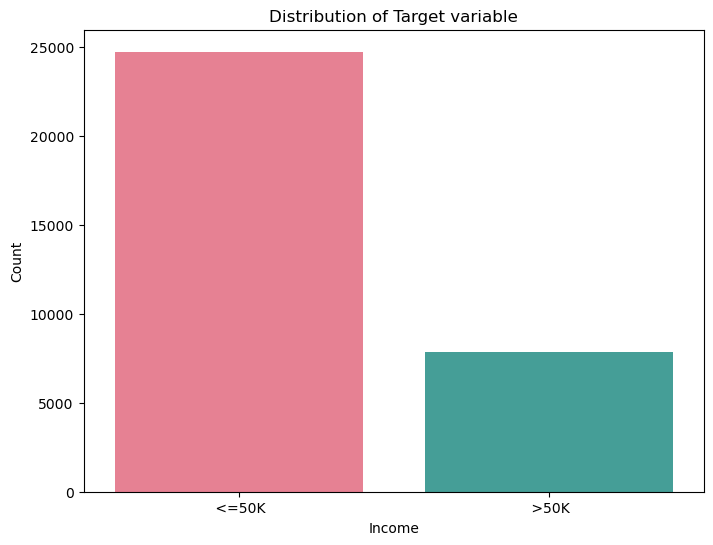

In [12]:
# Visualize the distribution of Income
col = 'Income'
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x=col, palette='husl')

plt.title('Distribution of Target variable')
plt.xlabel(col)
plt.ylabel('Count')
plt.show()


We can observe that there are more people who are falling in <=50k catergory when compared to >50k.

In [88]:
#Lets replace the target variable with0 and 1
df['Income'] = df['Income'].replace({'<=50K':0,'>50K':1})
df['Income']

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32555     <=50K
32556      >50K
32557     <=50K
32558     <=50K
32559      >50K
Name: Income, Length: 32536, dtype: object

In [13]:
#Categorical Variables - Unique Values
# Separating Numerical and Categorical columns
categorical_col = []
numerical_col = []

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
    else:
        numerical_col.append(i)

#  Numerical and Categorical columns
print(f"Categorical Columns:\n {categorical_col}\n")
print(f"Numerical Columns:\n {numerical_col}\n")

Categorical Columns:
 ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']

Numerical Columns:
 ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']



In [16]:
# Checking the value counts of the categorical independent variables
for i, col in enumerate(categorical_col[1:]):
    print(f"{i+1}.{col}:\n{df[col].value_counts()}\n")

1.Education:
Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64

2.Marital_status:
Marital_status
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64

3.Occupation:
Occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Fa

In [17]:
#Numerical Variables - Unique Values
# Checking the value counts of the numerical independent variables
for i, col in enumerate(numerical_col):
    print(f"{i+1}.{col}:\n{df[col].value_counts()}\n")

1.Age:
Age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64

2.Fnlwgt:
Fnlwgt
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: count, Length: 21647, dtype: int64

3.Education_num:
Education_num
9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: count, dtype: int64

4.Capital_gain:
Capital_gain
0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: count, Length: 119, dtype: int64

5.Capital_loss:
Capital_loss
0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1

In [18]:
print(f"% of zeros in Capital_gain column is {df.Capital_gain.value_counts(normalize=True)[0]*100:.2f}%")
print(f"% of zeros in Capital_loss column is {df.Capital_loss.value_counts(normalize=True)[0]*100:.2f}%")

% of zeros in Capital_gain column is 91.67%
% of zeros in Capital_loss column is 95.33%


Unique Values for Capital gain and capital loss variables. 

In [25]:
#Summary Statistics of the dataset 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32536.0,38.585536,13.638193,17.0,28.0,37.0,48.00,90.0
Fnlwgt,32536.0,189784.298992,105556.258211,12285.0,117831.5,178356.0,236993.25,1484705.0
Education_num,32536.0,10.081725,2.571622,1.0,9.0,10.0,12.00,16.0
Capital_gain,32536.0,1078.410069,7388.068465,0.0,0.0,0.0,0.00,99999.0
Capital_loss,32536.0,87.370912,403.107737,0.0,0.0,0.0,0.00,4356.0
Hours_per_week,32536.0,40.440343,12.347079,1.0,40.0,40.0,45.00,99.0


Observations:

The summary of the dataset shows there are no negative/invalid values present.

The counts are the same as the total of rows in all columns which means there are no missing values. However, almost all the observations of Capital_gain and Capital_loss columns are zeros.

The dependent variable Income is categorical with two unique values <=50K/>50K.

The mean value is larger than the median(50%) in columns Fnlwgt, Capital_gain, and Capital_loss, which means the data could be skewed to the right in these columns.

The dataset could present outliers in the columns Fnlwgt, Capital_gain, and Capital_loss, however in the univariate analysis of each feature we will verify it.

The features are not on the same scale. Features should be on the same scale for algorithms.

In [21]:
# Look at the non numeric columns
df.describe(exclude=[np.number])

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
count,32560,32560,32560,32560,32560,32560,32560,32560,32560
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27815,21789,29169,24719


In [22]:
# Searching for duplicated values
df.duplicated().sum()

24

There are 24 duplicate records in the dataset.

In [23]:
#Dropping the duplicate records
df.drop_duplicates(inplace=True)

In [24]:
df.shape

(32536, 15)

Now the dataset dimension is 32,536 rows and 15 columns,so 24 duplicate records deletion has been done.

In [27]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [28]:
df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [30]:
df.loc[df.Native_country==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
13,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
37,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
50,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
92,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32448,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
32468,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
32491,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K
32509,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K


We can observe that Native Country has 582 missing values.

In [33]:
df.loc[df.Occupation==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


We can observe that 1843 of occupation values are missing.

In [34]:
# Define the mapping for combining categories
category_mapping = {
    'Assoc-voc': 'Associate',
    'Assoc-acdm': 'Associate',
    '11th': 'Below High School',
    '10th': 'Below High School',
    '7th-8th': 'Below High School',
    '9th': 'Below High School',
    '12th': 'Below High School',
    '5th-6th': 'Below High School',
    '1st-4th': 'Below High School',
    'Preschool': 'Below High School'
}
col = 'Education'

# Eliminating extra spaces 
df[col] = df[col].str.strip()

# In column Occupation_bk will reserve the original values
df['Education_bk'] = df[col]

# Assing the combined categories
df[col] = df[col].replace(category_mapping)
df[col].unique()

array(['Bachelors', 'HS-grad', 'Below High School', 'Masters',
       'Some-college', 'Associate', 'Doctorate', 'Prof-school'],
      dtype=object)

In [35]:
# Define the order for the category Education with original values.
col = 'Education_bk'
order_cat =  ['Doctorate', 'Masters', 'Bachelors', 'Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college','HS-grad', 
              '11th', '10th', '7th-8th', '9th', '12th', '5th-6th', '1st-4th', 'Preschool']
df[col] = pd.Categorical(df[col], categories=order_cat, ordered=True)

# Confirming setting the category
print(f"Categories for {col}:")
display(df[col].dtype)

Categories for Education_bk:


CategoricalDtype(categories=['Doctorate', 'Masters', 'Bachelors', 'Assoc-voc',
                  'Assoc-acdm', 'Prof-school', 'Some-college', 'HS-grad',
                  '11th', '10th', '7th-8th', '9th', '12th', '5th-6th',
                  '1st-4th', 'Preschool'],
, ordered=True)

In [36]:
# Define the order for the categorical features.

categories_order = {}

for i,col in enumerate(categorical_col[:-1]):
    print(f"{i+1}.{col}:")
    
    # Eliminating extra spaces 
    df[col] = df[col].str.strip()
    # Defining ? == Unknown
    df[col] = df[col].str.replace('?', 'Unknown') # Later these will considering missing values

    # Transform to ordered categories
    if col == 'Education':
        order_cat = ['Doctorate', 'Masters', 'Bachelors', 'Associate', 'Prof-school',
                     'Some-college','HS-grad', 'Below High School']
    else:   
        order_cat = df[col].value_counts().index.to_list()
    
    categories_order[col] = order_cat
    df[col] = pd.Categorical(df[col], categories=order_cat, ordered=True)

# Confirming setting the category
    display(df[col].dtype)

1.Workclass:


CategoricalDtype(categories=['Private', 'Self-emp-not-inc', 'Local-gov', 'Unknown',
                  'State-gov', 'Self-emp-inc', 'Federal-gov', 'Without-pay',
                  'Never-worked'],
, ordered=True)

2.Education:


CategoricalDtype(categories=['Doctorate', 'Masters', 'Bachelors', 'Associate',
                  'Prof-school', 'Some-college', 'HS-grad',
                  'Below High School'],
, ordered=True)

3.Marital_status:


CategoricalDtype(categories=['Married-civ-spouse', 'Never-married', 'Divorced',
                  'Separated', 'Widowed', 'Married-spouse-absent',
                  'Married-AF-spouse'],
, ordered=True)

4.Occupation:


CategoricalDtype(categories=['Prof-specialty', 'Craft-repair', 'Exec-managerial',
                  'Adm-clerical', 'Sales', 'Other-service',
                  'Machine-op-inspct', 'Unknown', 'Transport-moving',
                  'Handlers-cleaners', 'Farming-fishing', 'Tech-support',
                  'Protective-serv', 'Priv-house-serv', 'Armed-Forces'],
, ordered=True)

5.Relationship:


CategoricalDtype(categories=['Husband', 'Not-in-family', 'Own-child', 'Unmarried', 'Wife',
                  'Other-relative'],
, ordered=True)

6.Race:


CategoricalDtype(categories=['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
                  'Other'],
, ordered=True)

7.Sex:


CategoricalDtype(categories=['Male', 'Female'], ordered=True)

8.Native_country:


CategoricalDtype(categories=['United-States', 'Mexico', 'Unknown', 'Philippines',
                  'Germany', 'Canada', 'Puerto-Rico', 'El-Salvador', 'India',
                  'Cuba', 'England', 'Jamaica', 'South', 'China', 'Italy',
                  'Dominican-Republic', 'Vietnam', 'Japan', 'Guatemala',
                  'Poland', 'Columbia', 'Taiwan', 'Haiti', 'Iran', 'Portugal',
                  'Nicaragua', 'Peru', 'France', 'Greece', 'Ecuador',
                  'Ireland', 'Hong', 'Cambodia', 'Trinadad&Tobago', 'Laos',
                  'Thailand', 'Yugoslavia', 'Outlying-US(Guam-USVI-etc)',
                  'Honduras', 'Hungary', 'Scotland', 'Holand-Netherlands'],
, ordered=True)

In [37]:
# List of categorical columns in the dataset
for i,col in enumerate(categorical_col[:-1]):
    print(f"{i+1}.{col}")

1.Workclass
2.Education
3.Marital_status
4.Occupation
5.Relationship
6.Race
7.Sex
8.Native_country


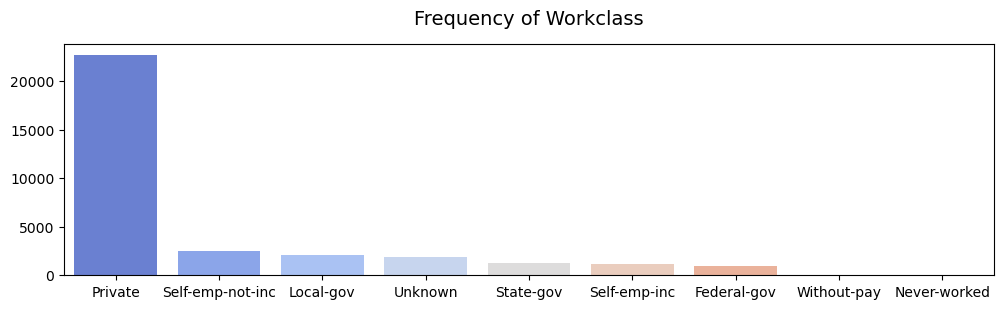

In [39]:
# Visualize the frequency of Workclass(1)
col = 'Workclass'
plt.figure(figsize=(12, 3))
df_counts = df[col].value_counts()
ax = sns.barplot(x=df_counts.index, y=df_counts.values, palette='coolwarm', order=df_counts.index.categories.to_list())

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

In [40]:
# Display the counts and % of each category
df[col].value_counts().to_frame().T

Workclass,Private,Self-emp-not-inc,Local-gov,Unknown,State-gov,Self-emp-inc,Federal-gov,Without-pay,Never-worked
count,22673,2540,2093,1836,1297,1116,960,14,7


In [98]:
df.columns
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Education_bk
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Bachelors
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,HS-grad
2,53,Private,234721,Below High School,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,11th
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Bachelors
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,Masters


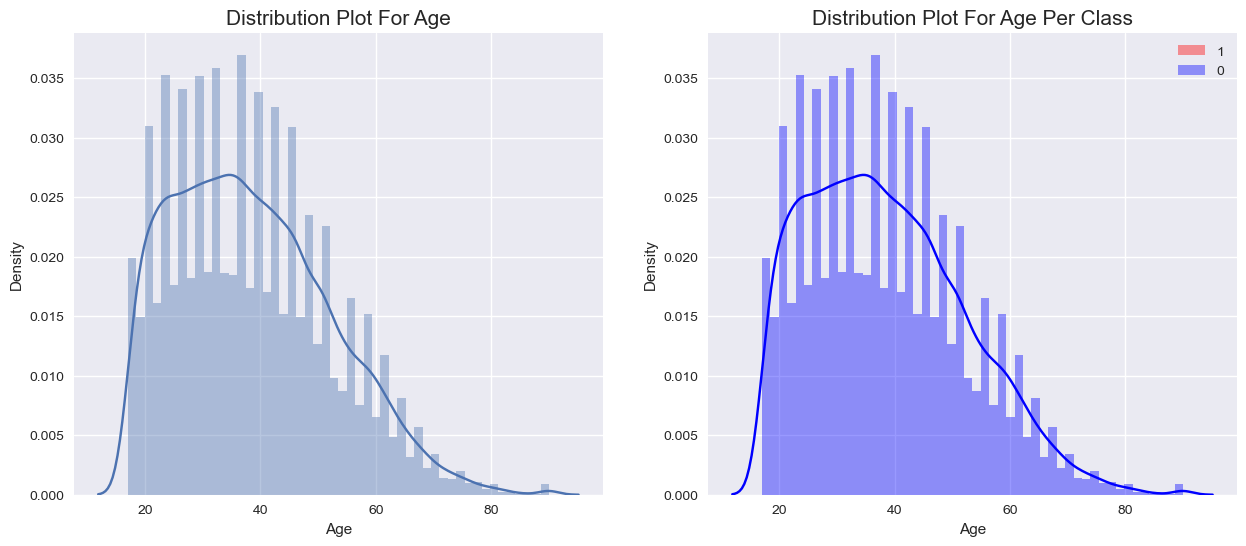

In [100]:
# Distribution plot for age column
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sns.distplot(df['Age'])
plt.title('Distribution Plot For Age', fontsize = 15)

# Distribution plot for age per class
plt.subplot(1,2,2)
sns.distplot(df[df['Income']>'50K']['Age'], label='1', color='red')
sns.distplot(df[df['Income']<='50K']['Age'],label='0', color='blue')
plt.legend()
plt.title('Distribution Plot For Age Per Class', fontsize = 15)
plt.show()

We can observe that distribution plot for age column, most no of people are young.
By looking distribution plot for age per class graph we can say that there are relatively less young people who have an annual income is more than 50K.


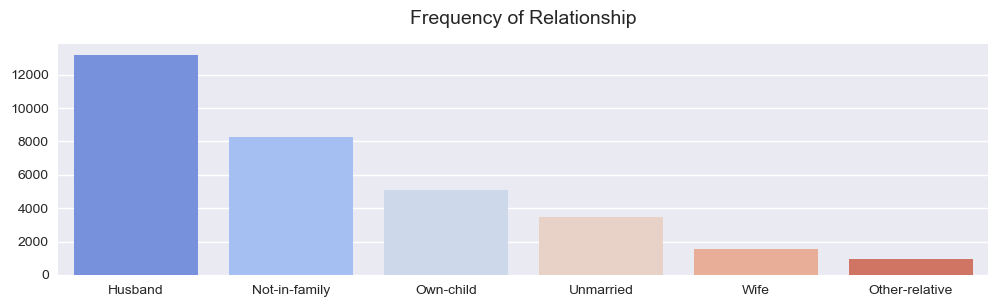

In [109]:
# Visualize the frequency of Relationship
col = 'Relationship'
plt.figure(figsize=(12, 3))
ax = sns.countplot(x=col, data=df, palette='coolwarm')

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)
plt.show()

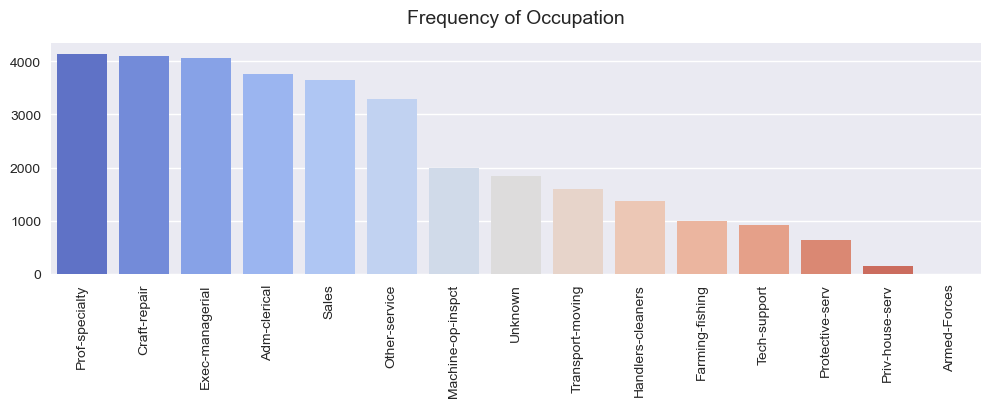

In [112]:
# Visualize the frequency of Occupation
col = 'Occupation'
plt.figure(figsize=(12, 3))
ax = sns.countplot(x=col, data=df, palette='coolwarm')

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)
plt.xticks(rotation=90)
plt.show()

We can observe that prof speciality people are of higher income. 

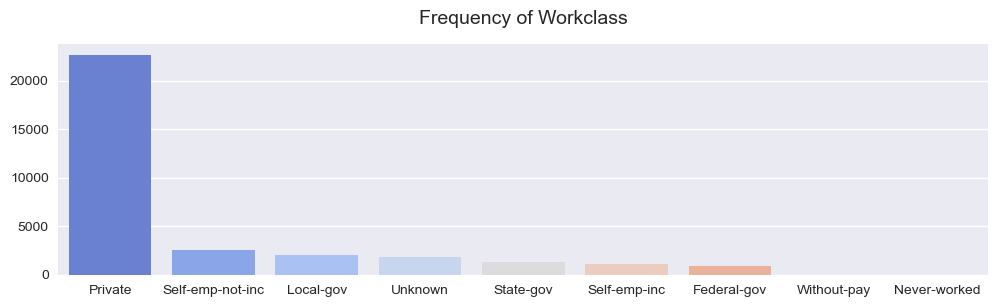

In [113]:
# Visualize the frequency of Workclass
col = 'Workclass'
plt.figure(figsize=(12, 3))
ax = sns.countplot(x=col, data=df, palette='coolwarm')

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)
plt.show()

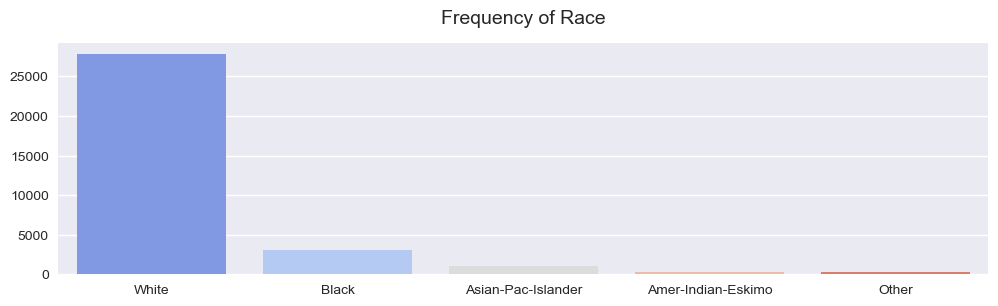

In [114]:
# Visualize the frequency of Race
col = 'Race'
plt.figure(figsize=(12, 3))
ax = sns.countplot(x=col, data=df, palette='coolwarm')

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)
plt.show()

We can observe white people are of having higher concentration.

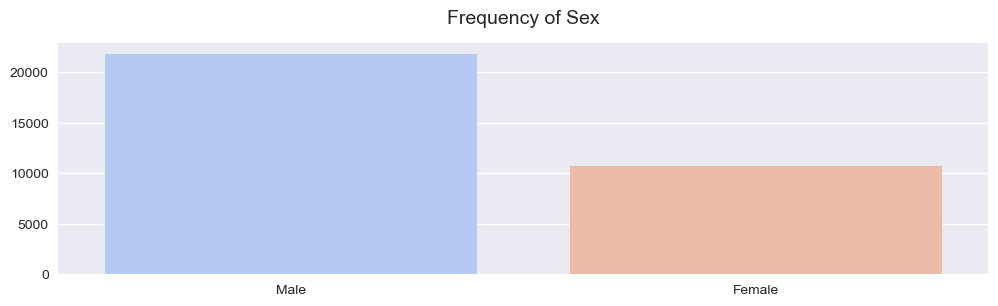

In [115]:
# Visualize the frequency of Sex
col = 'Sex'
plt.figure(figsize=(12, 3))
ax = sns.countplot(x=col, data=df, palette='coolwarm')


plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)
plt.show()


Male workers are of more to the income contribution.

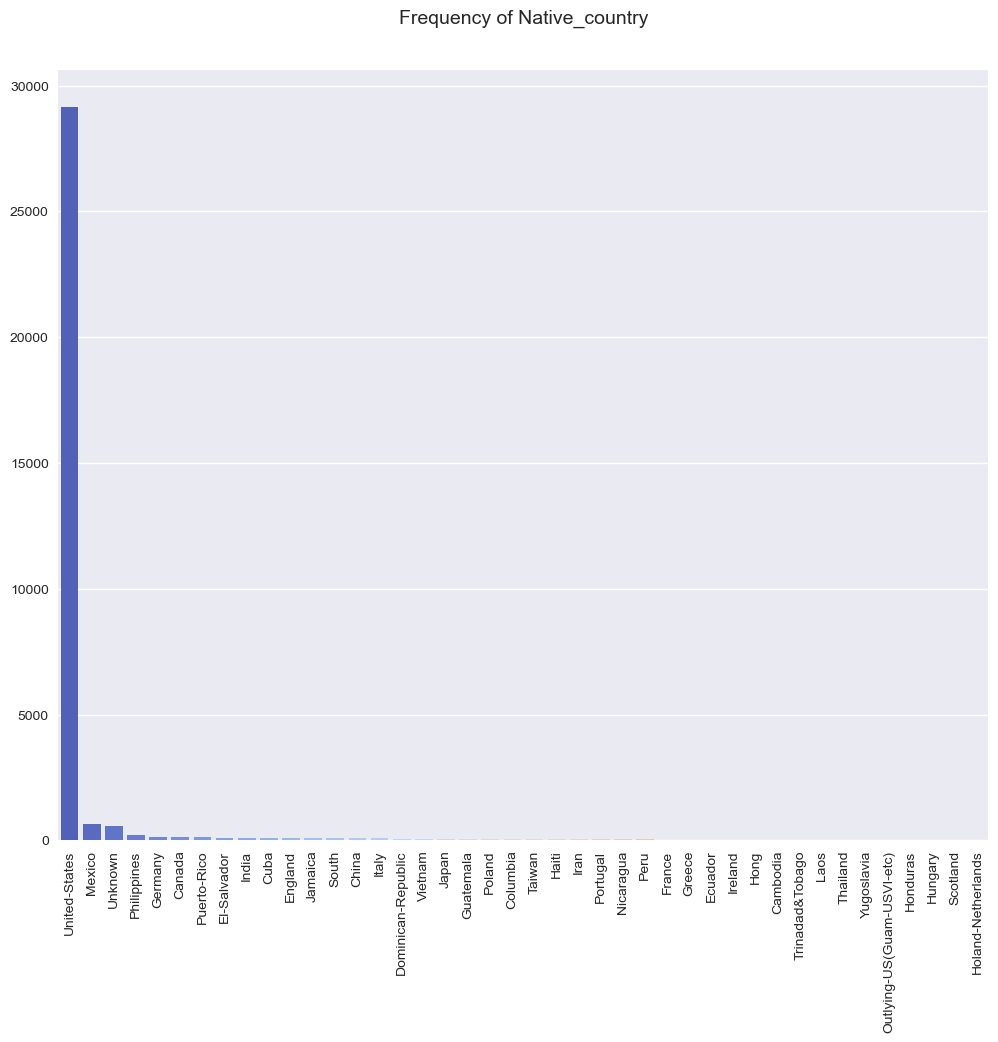

In [118]:
# Visualize the frequency of Native_country
col = 'Native_country'
plt.figure(figsize=(12, 10))
ax = sns.countplot(x=col, data=df, palette='coolwarm')

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)
plt.xticks(rotation=90)
plt.show()

We can observe united states nativity has been seen higher.

In [119]:
#Numerical Columns
# List of numerical columns
for i,col in enumerate(numerical_col):
    print(f"{i+1}. {col}")

1. Age
2. Fnlwgt
3. Education_num
4. Capital_gain
5. Capital_loss
6. Hours_per_week


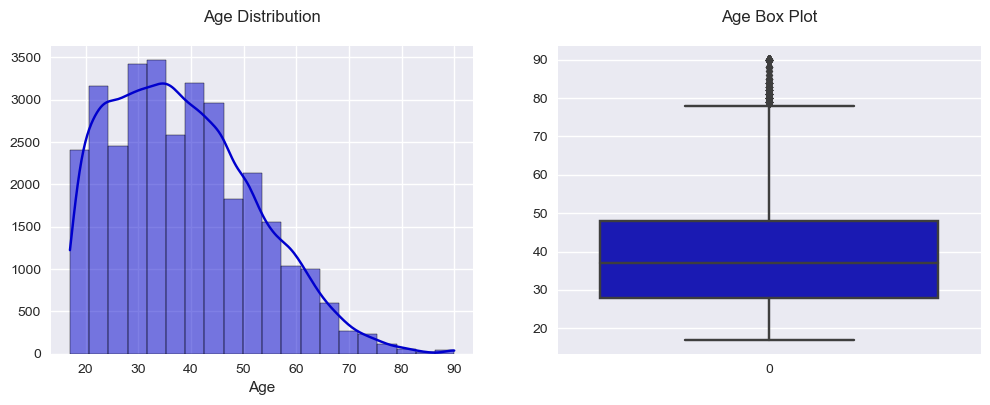

Skewness of Age : 0.557657407634356


In [120]:
#Visualize (1) Age distribution
col = 'Age'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='mediumblue')
sns.boxplot(df[col], ax=axes[1], color='mediumblue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Age
print(f"Skewness of {col} : {df[col].skew()}")

There is skewness to the right and outliers are present.

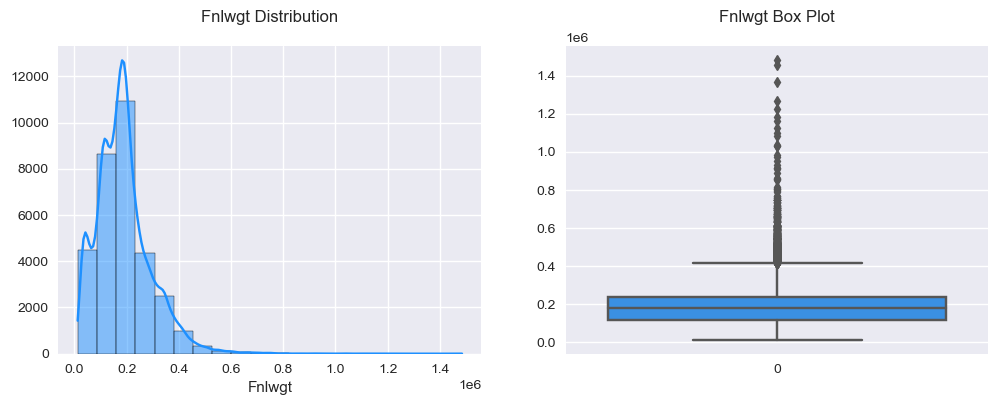

Skewness of Fnlwgt : 1.447695071063747


In [121]:
#Visualize (2) Fnlwgt distribution
col = 'Fnlwgt'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='dodgerblue')
sns.boxplot(df[col], ax=axes[1], color='dodgerblue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

There is skewness to the right and outliers present.

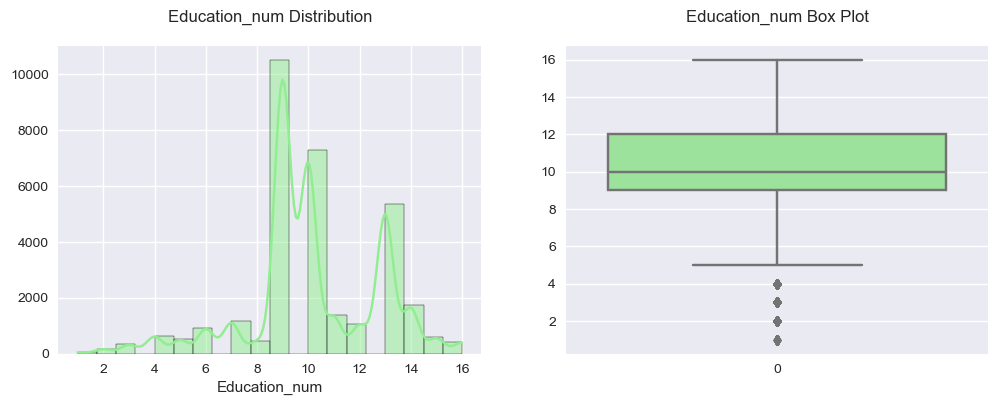

Skewness of Education_num : -0.30945415628220213


In [123]:
#Visualize (3) Education_num distribution
col = 'Education_num'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='lightgreen')
sns.boxplot(df[col], ax=axes[1], color='lightgreen')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Education_num
print(f"Skewness of {col} : {df[col].skew()}")

There is skewness to the left adn outliers present.

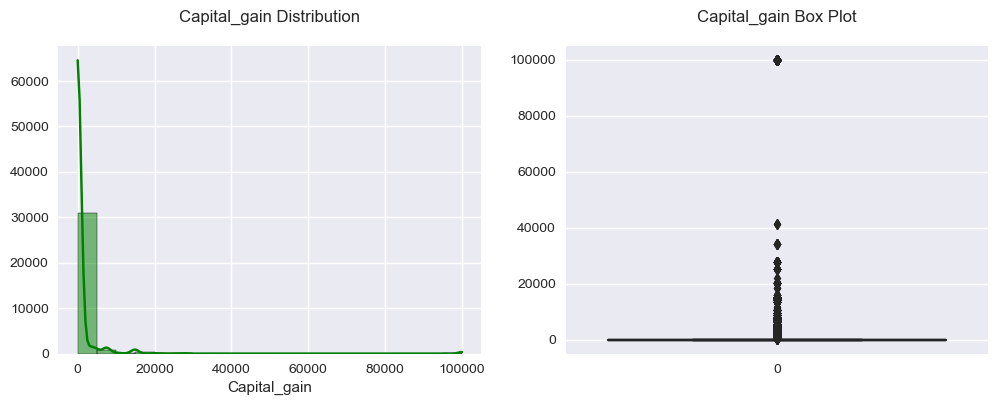

Skewness of Capital_gain : 11.949244909052934


In [124]:
#Visualize (4) Capital_gain distribution
col = 'Capital_gain'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='g')
sns.boxplot(df[col], ax=axes[1], color='g')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Capital_gain
print(f"Skewness of {col} : {df[col].skew()}")

Huge skewness to the right and outliers are maximum.

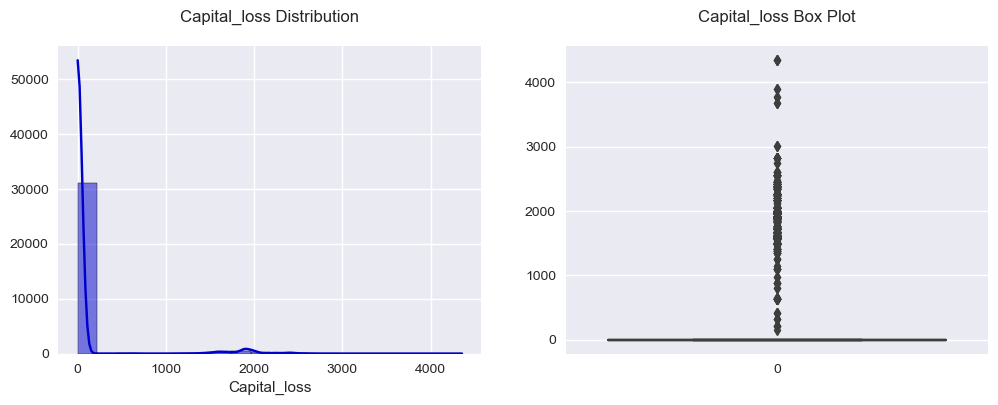

Skewness of Capital_loss : 4.592622126751731


In [125]:
#Visualize (5) Capital_loss distribution
col = 'Capital_loss'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='mediumblue')
sns.boxplot(df[col], ax=axes[1], color='mediumblue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Capital_loss
print(f"Skewness of {col} : {df[col].skew()}")

There is skewness to the right and outliers are present.

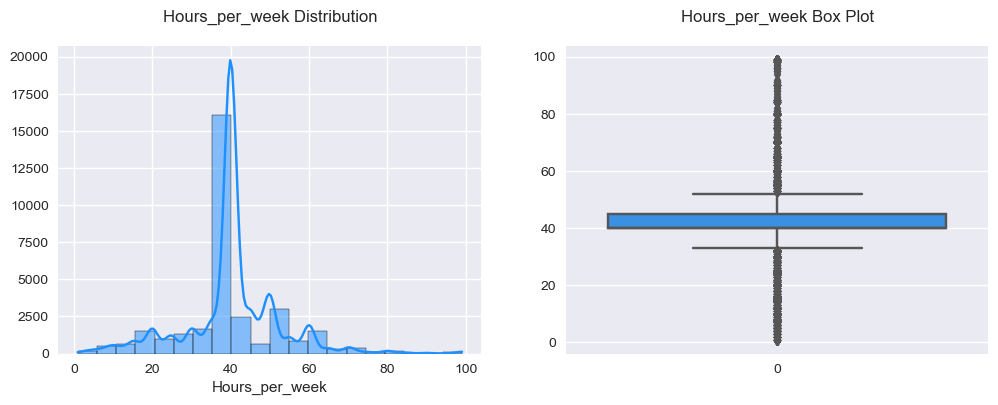

Skewness of Hours_per_week : 0.2287520890962958


In [126]:
#Visualize (6) Hours_per_week distribution
col = 'Hours_per_week'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='dodgerblue')
sns.boxplot(df[col], ax=axes[1], color='dodgerblue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Hours_per_week
print(f"Skewness of {col} : {df[col].skew()}")

Skewness distribution seems to be normal, outliers are present. 

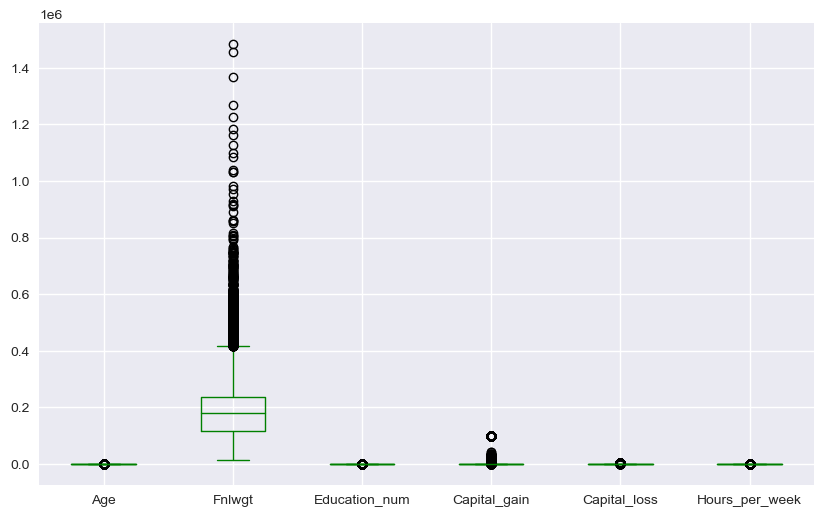

In [127]:
#Univariate Box Plot
# Draw a boxplot for numericak variables
plt.figure(figsize=(10, 6))
df.boxplot(column=numerical_col, figsize=(10,10), color='green');


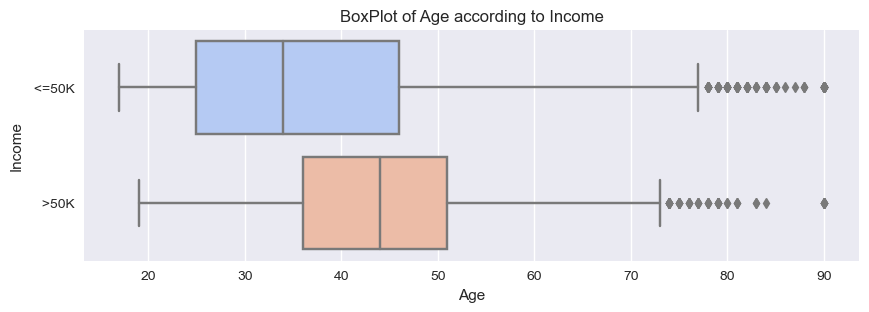

In [128]:
# Visualizing and comparing each independent variable with target
# Age 
col = 'Age'
plt.figure(figsize=(10, 3))
sns.boxplot(data=df[[col,'Income']], x=col, y='Income', palette='coolwarm')
plt.title(f"BoxPlot of {col} according to Income")
    
plt.show()

Those with an income of more than >50k tend to be between 36 and 51 years old, and those with less income tend to be between 24 an 45 years old. There are outliers both for those with an income >50k and for those with a lower income. Seems like age has an influence on the target variable.

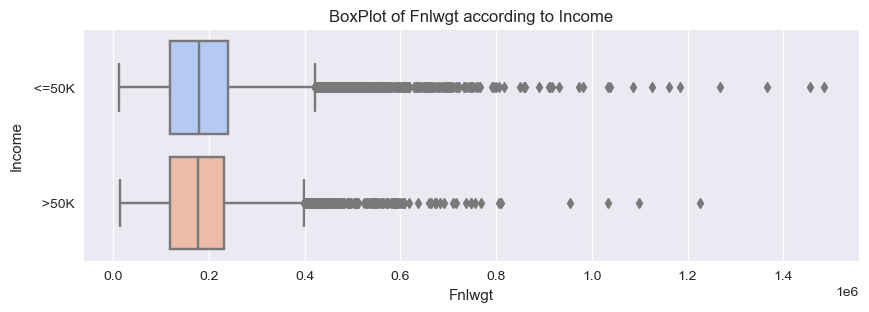

In [129]:
# Visualizing and comparing each independent variable with target
# Fnlwgt 
col = 'Fnlwgt'
plt.figure(figsize=(10, 3))
sns.boxplot(data=df[[col,'Income']], x=col, y='Income', palette='coolwarm')
plt.title(f"BoxPlot of {col} according to Income")
    
plt.show()

The final weight (Fnlwgt) seems to behave similarly for those who have a >50 income as those who have a lower income. However, the group with an income <=50K presents more outliers. This feature seems to have no significant impact on the target variable.

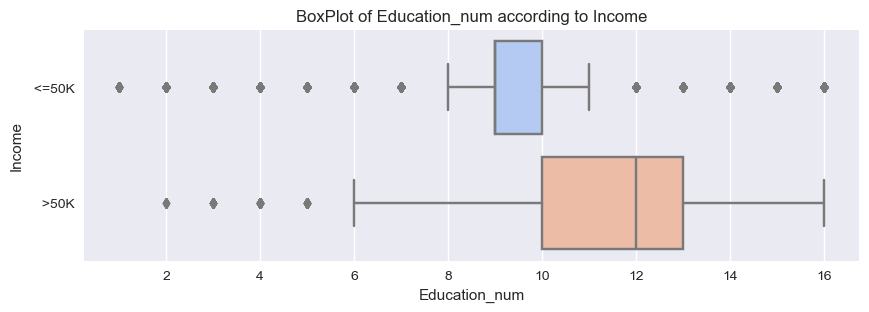

In [130]:
# Visualizing and comparing each independent variable with target
#  Education_num 
col = 'Education_num'
plt.figure(figsize=(10, 3))
sns.boxplot(data=df[[col,'Income']], x=col, y='Income', palette='coolwarm')
plt.title(f"BoxPlot of {col} according to Income")
    
plt.show()


It seems like the Education number has an impact on those who have a >50K income since those who have 10 years of education or more tend to perceive >50k as income.

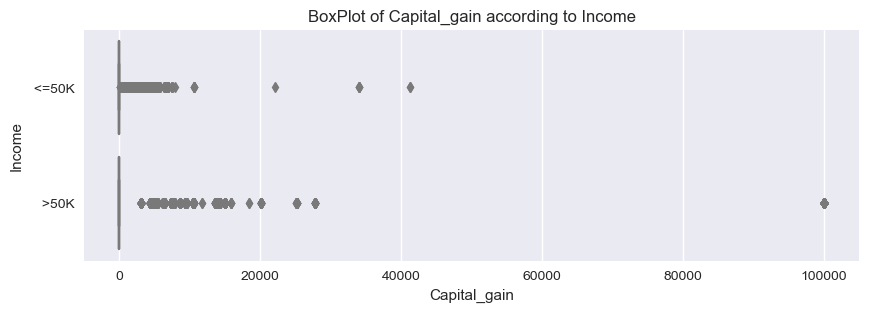

In [131]:
# Visualizing and comparing each independent variable with target
#Capital_gain 
col = 'Capital_gain'
plt.figure(figsize=(10, 3))
sns.boxplot(data=df[[col,'Income']], x=col, y='Income', palette='coolwarm')
plt.title(f"BoxPlot of {col} according to Income")
    
plt.show()



The majority of observations of Capital gain are zeros. The other observations are shown as outliers.

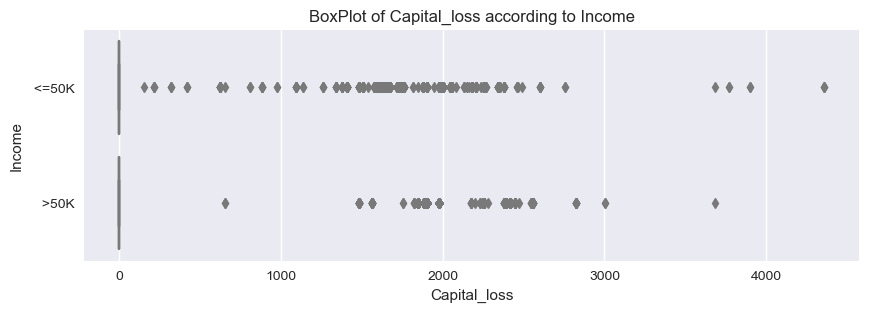

In [132]:
# Visualizing and comparing each independent variable with target
#Capital_loss 
col = 'Capital_loss'
plt.figure(figsize=(10, 3))
sns.boxplot(data=df[[col,'Income']], x=col, y='Income', palette='coolwarm')
plt.title(f"BoxPlot of {col} according to Income")
    
plt.show()

The majority of observations of Capital Loss are zeros. The other observations are shown as outliers.

In [133]:
# Filter the non-zero observations for Capital_gain/Capital_loss
df_capital = df[(df['Capital_gain'] > 0) | (df['Capital_loss'] > 0) ]


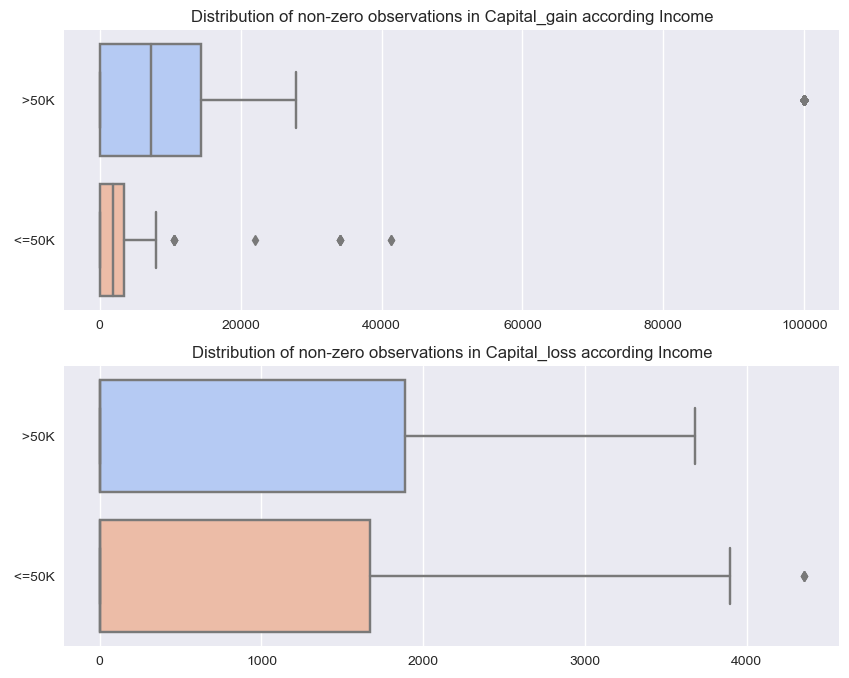

In [134]:
# Box-plot comparing the non-zero observation in Capital gain and Capital loss according to Income
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

col = 'Capital_gain'
sns.boxplot(data=df_capital[[col,'Income']], x=col, y='Income', palette='coolwarm', ax=axes[0])
axes[0].set_title(f"Distribution of non-zero observations in {col} according Income", size=12, y=1);
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].set_xlabel('', size=10, labelpad=8)

col = 'Capital_loss'
sns.boxplot(data=df_capital[[col,'Income']], x=col, y='Income', palette='coolwarm', ax=axes[1])
axes[1].set_title(f"Distribution of non-zero observations in {col} according Income", size=12, y=1);
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].set_xlabel('', size=10, labelpad=8)

plt.show()

In the above plot, we can notice the impact of the non-zero values for Capital_gain/Capital_loss in the target variable. Those who have an income >50K had a capital gain more than those who have an income <=50K as we can see in the upper boxplot. On the other hand, those who have an income >50K had a capital loss slightly higher than those who have a lower income(<=50K)



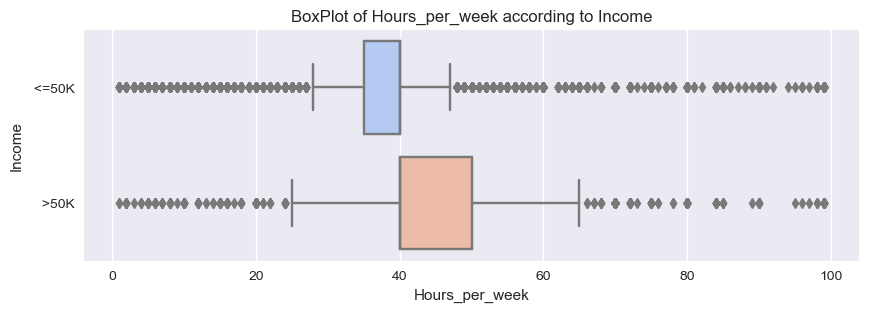

In [135]:
# Visualizing and comparing each independent variable with target
# Hours_per_week 
col = 'Hours_per_week'
plt.figure(figsize=(10, 3))
sns.boxplot(data=df[[col,'Income']], x=col, y='Income', palette='coolwarm')
plt.title(f"BoxPlot of {col} according to Income")
    
plt.show()

Those who work 40 hours per week or more tend to have an income >50K. The majority of those who have an income <=50K tend to work less than 40 hours per week.

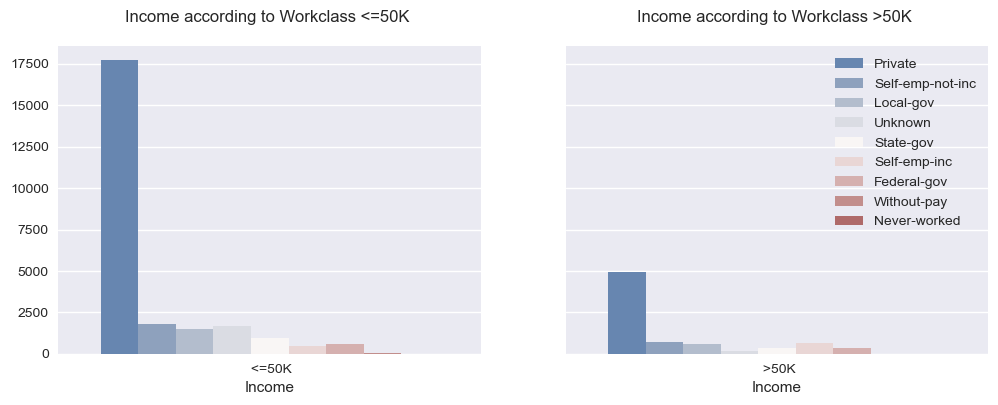

In [137]:
#Relation between target variable and categorical columns
# Compare Workclass vs Income
col = 'Workclass' 

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

df_less_50K = df[df['Income'] == ' <=50K']
df_more_50K = df[df['Income'] == ' >50K']

sns.countplot(x='Income', hue=col, data=df_less_50K, palette='vlag', ax=axes[0])
axes[0].set_title(f"Income according to {col} <=50K ", size=12, y=1.05);
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].legend().remove()

sns.countplot(x='Income', hue=col, data=df_more_50K, palette='vlag', ax=axes[1])
axes[1].set_title(f"Income according to {col} >50K ", size=12, y=1.05);
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].legend(loc='upper right')

plt.show()

we can conclude that the majority of the observations belong to the private work class regardless of their income range.

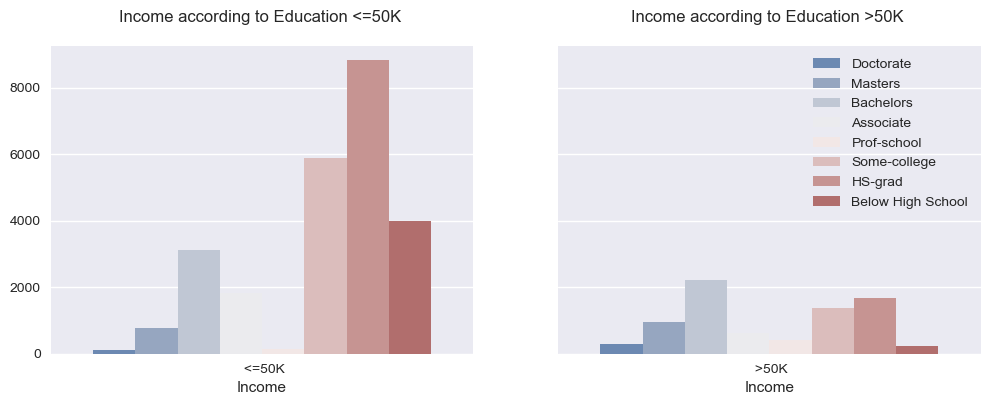

In [138]:
# Compare Education vs Income
col = 'Education'

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

df_less_50K = df[df['Income'] == ' <=50K']
df_more_50K = df[df['Income'] == ' >50K']

sns.countplot(x='Income', hue=col, data=df_less_50K, palette='vlag', ax=axes[0])
axes[0].set_title(f"Income according to {col} <=50K ", size=12, y=1.05);
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].legend().remove()

sns.countplot(x='Income', hue=col, data=df_more_50K, palette='vlag', ax=axes[1])
axes[1].set_title(f"Income according to {col} >50K ", size=12, y=1.05);
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].legend(loc='upper right')

plt.show()


Seems the Education feature has an influence on the income range since the majority of those who have an income >50K have a Bachelor's degree.

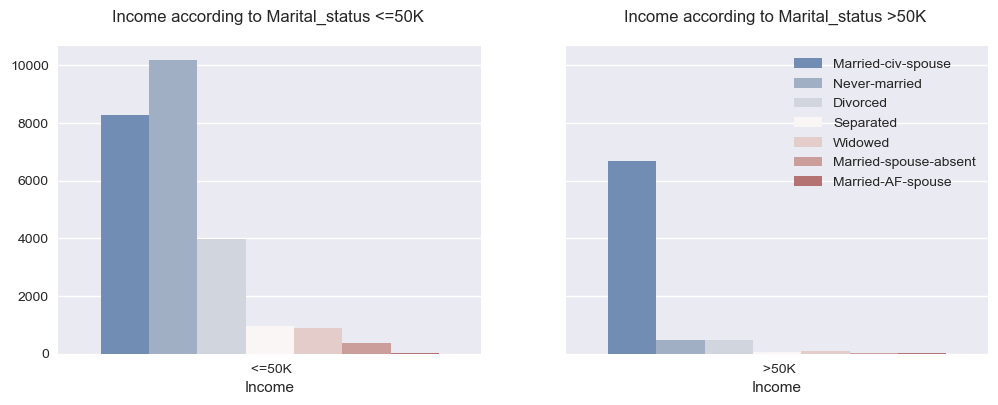

In [142]:
# Compare Marital_status vs Income
col = 'Marital_status'

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

df_less_50K = df[df['Income'] == ' <=50K']
df_more_50K = df[df['Income'] == ' >50K']

sns.countplot(x='Income', hue=col, data=df_less_50K, palette='vlag', ax=axes[0])
axes[0].set_title(f"Income according to {col} <=50K ", size=12, y=1.05);
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].legend().remove()

sns.countplot(x='Income', hue=col, data=df_more_50K, palette='vlag', ax=axes[1])
axes[1].set_title(f"Income according to {col} >50K ", size=12, y=1.05);
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].legend(loc='upper right')

plt.show()

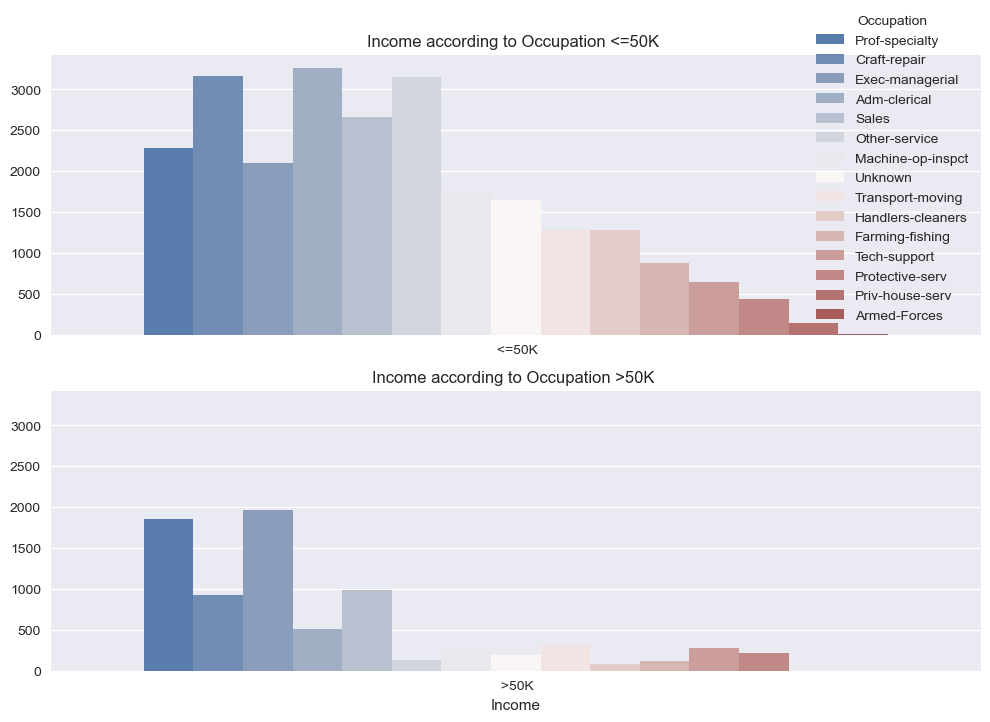

In [144]:
# Compare Occupation vs Income
col = 'Occupation'

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharey=True)

df_less_50K = df[df['Income'] == ' <=50K']
df_more_50K = df[df['Income'] == ' >50K']

sns.countplot(x='Income', hue=col, data=df_less_50K, palette='vlag', ax=axes[0])

axes[0].set_title(f"Income according to {col} <=50K ", size=12, y=1);
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].set_xlabel('', size=10, labelpad=8)


sns.countplot(x='Income', hue=col, data=df_more_50K, palette='vlag', ax=axes[1])
axes[1].set_title(f"Income according to {col} >50K ", size=12, y=1);
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].legend().remove()

plt.show()


We can observe majority of people who earn more than 50k income belong to Executive Managerial.

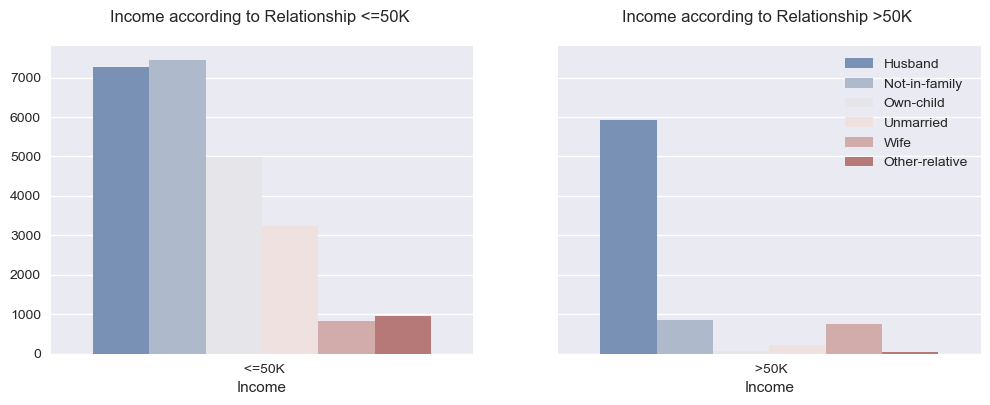

In [147]:
# Compare Relationship vs Income
col = 'Relationship' 

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

df_less_50K = df[df['Income'] == ' <=50K']
df_more_50K = df[df['Income'] == ' >50K']

sns.countplot(x='Income', hue=col, data=df_less_50K, palette='vlag', ax=axes[0])
axes[0].set_title(f"Income according to {col} <=50K ", size=12, y=1.05);
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].legend().remove()

sns.countplot(x='Income', hue=col, data=df_more_50K, palette='vlag', ax=axes[1])
axes[1].set_title(f"Income according to {col} >50K ", size=12, y=1.05);
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].legend(loc='upper right')

plt.show()


We can observe that higher income is owned by husbands and rest followed by not in family people.

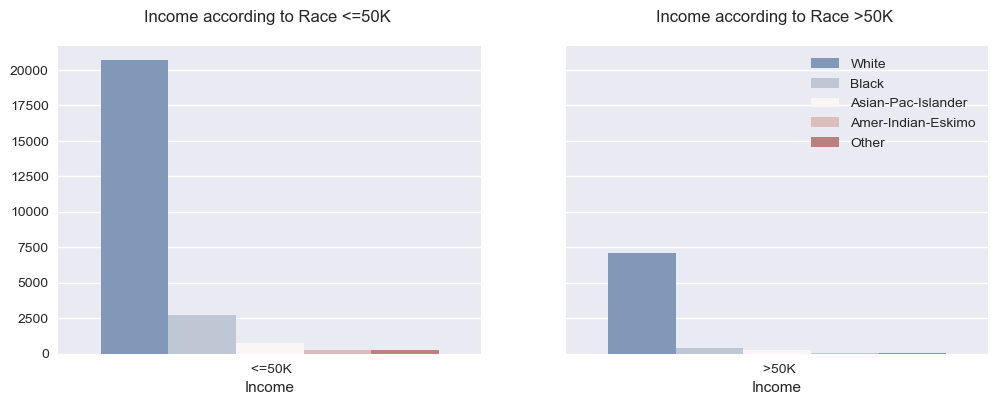

In [148]:
# Compare Race vs Income
col = 'Race'

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

df_less_50K = df[df['Income'] == ' <=50K']
df_more_50K = df[df['Income'] == ' >50K']

sns.countplot(x='Income', hue=col, data=df_less_50K, palette='vlag', ax=axes[0])
axes[0].set_title(f"Income according to {col} <=50K ", size=12, y=1.05);
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].legend().remove()

sns.countplot(x='Income', hue=col, data=df_more_50K, palette='vlag', ax=axes[1])
axes[1].set_title(f"Income according to {col} >50K ", size=12, y=1.05);
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].legend(loc='upper right')

plt.show()

Both cases white people are earning more.

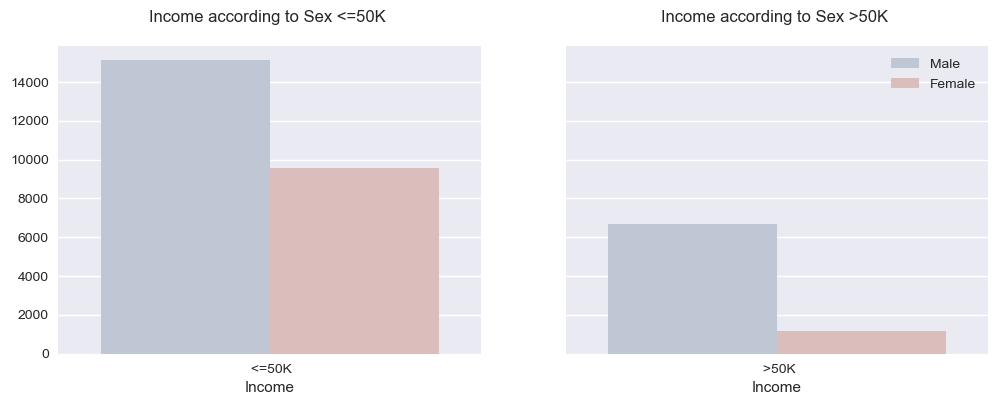

In [149]:
# Compare Sex vs Income
col = 'Sex'

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

df_less_50K = df[df['Income'] == ' <=50K']
df_more_50K = df[df['Income'] == ' >50K']

sns.countplot(x='Income', hue=col, data=df_less_50K, palette='vlag', ax=axes[0])
axes[0].set_title(f"Income according to {col} <=50K ", size=12, y=1.05);
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].legend().remove()

sns.countplot(x='Income', hue=col, data=df_more_50K, palette='vlag', ax=axes[1])
axes[1].set_title(f"Income according to {col} >50K ", size=12, y=1.05);
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].legend(loc='upper right')

plt.show()

We can conclude that male are higher in number in both the income ranges when compared to female.

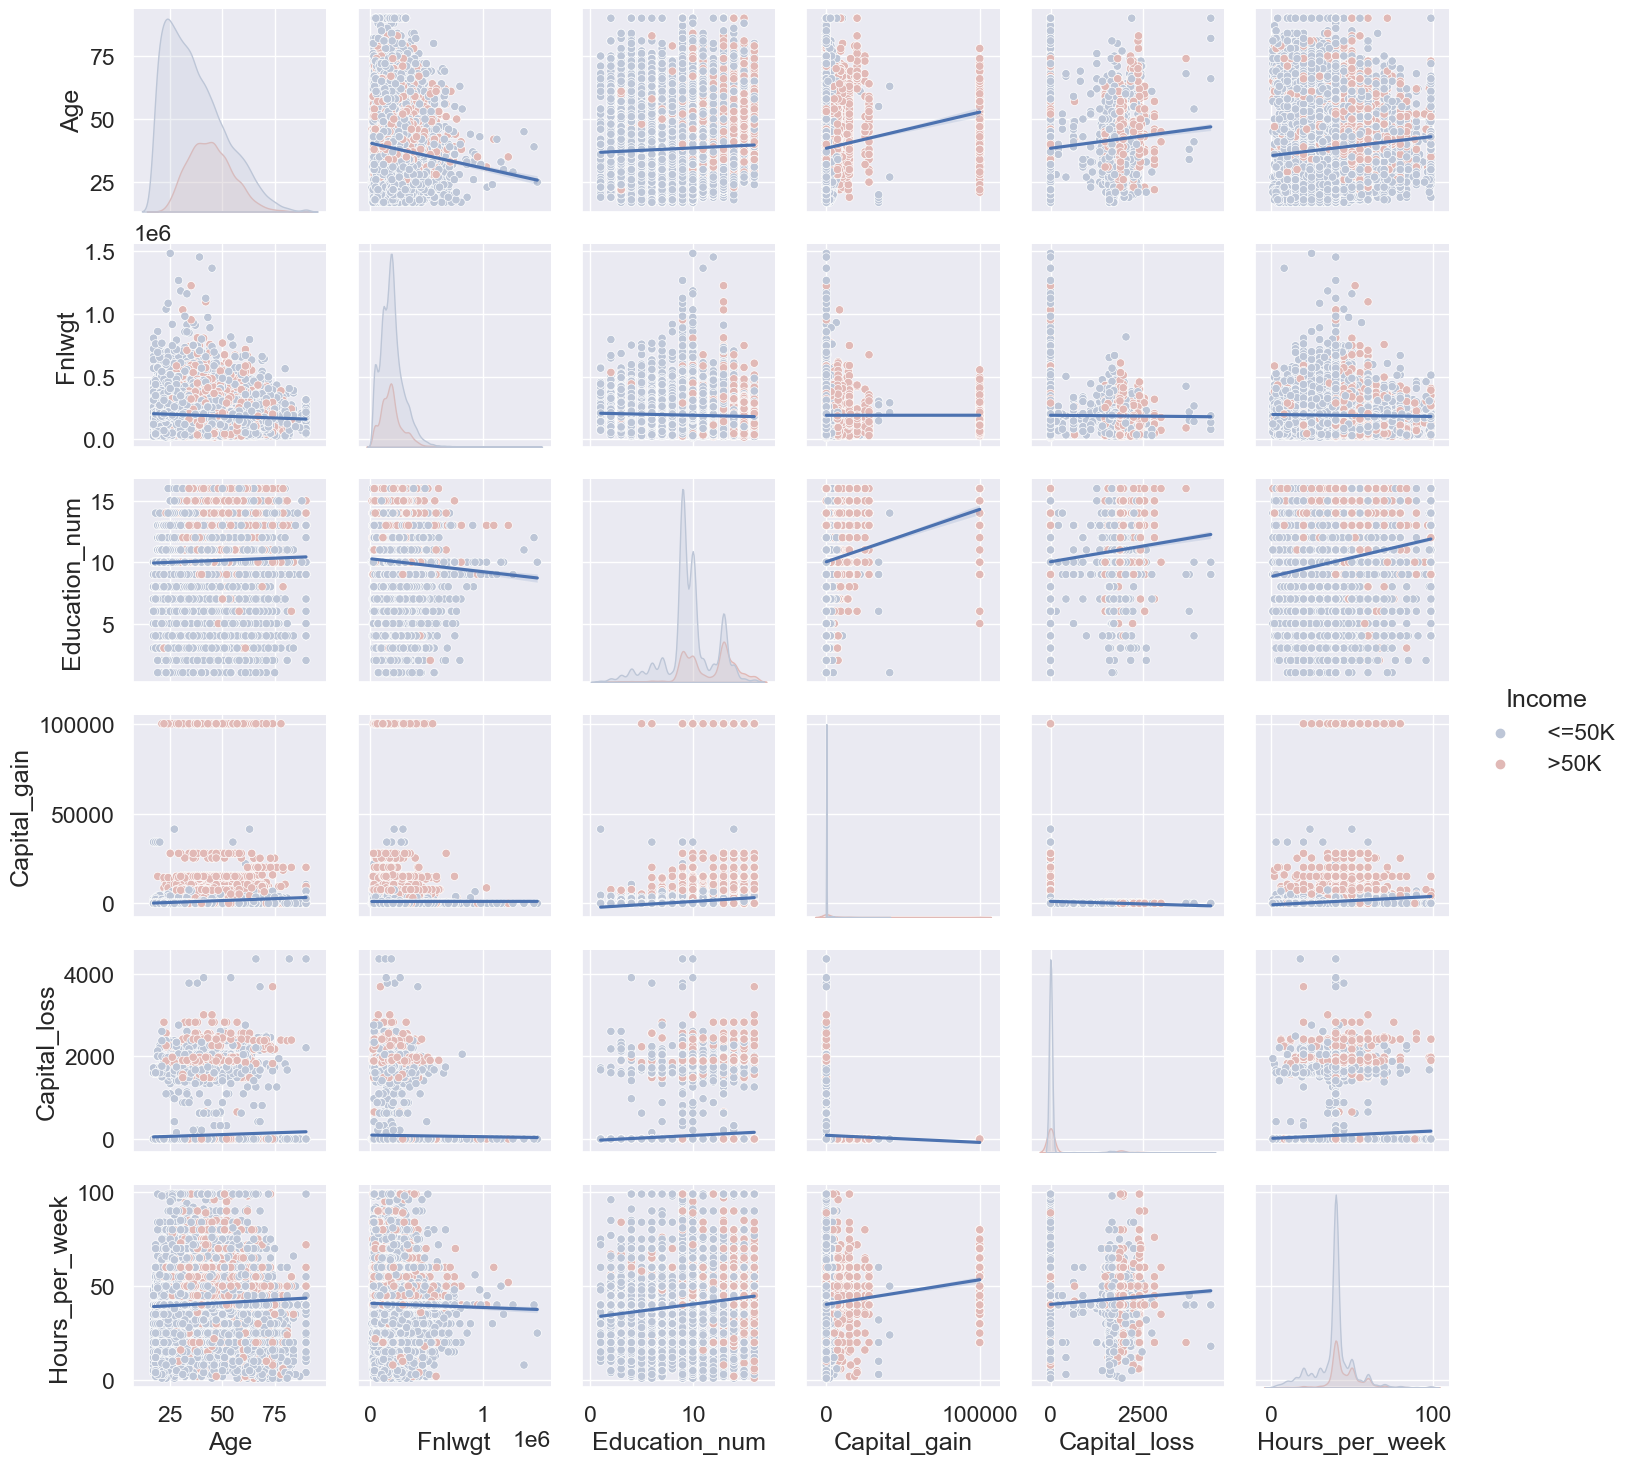

In [150]:
#Multivariate Analysis
#Pair Plot
sns.set(font_scale=1.5)  
grid = sns.pairplot(df, hue='Income', palette = "vlag")

# Add a regression line for non-diagonal plots
for ax in grid.axes.flat[1:-1]: # first and last axes are not considered
    if ax.get_xlabel() != ax.get_ylabel():
        sns.regplot(data=df, x=ax.get_xlabel(), y=ax.get_ylabel(), scatter=False, ax=ax, color='b')

plt.show()

There is a positive correlation between Education_num, Capital_gain, and Hours_per_week.

In [151]:
#Encoding the Target Variable
df['Income'] = df['Income'].str.strip()

df['Income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [236]:
df['Income'] = df['Income'].map({'<=50K': 0, '>50K': 1})
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,1,13,2,3,0,4,1,0,0,13,38,NaN
1,38,3,215646,4,9,0,5,1,4,1,0,0,40,38,NaN
2,53,3,234721,2,7,2,5,0,2,1,0,0,40,38,NaN
3,28,3,338409,1,13,2,9,5,2,0,0,0,40,4,NaN
4,37,3,284582,5,14,2,3,5,4,0,0,0,40,38,NaN


Now the label is encoded into 0 and 1.

In [171]:
#Correlation between the variables
# Calculate the correlation between features
cor = df[numerical_col].corr()
cor


,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076448,0.036224,0.077676,0.057745,0.068515
Fnlwgt,-0.076448,1.000000,-0.043353,0.000433,-0.010267,-0.018900
Education_num,0.036224,-0.043353,1.000000,0.122661,0.079901,0.148426
Capital_gain,0.077676,0.000433,0.122661,1.000000,-0.031638,0.078408
Capital_loss,0.057745,-0.010267,0.079901,-0.031638,1.000000,0.054229
Hours_per_week,0.068515,-0.018900,0.148426,0.078408,0.054229,1.000000


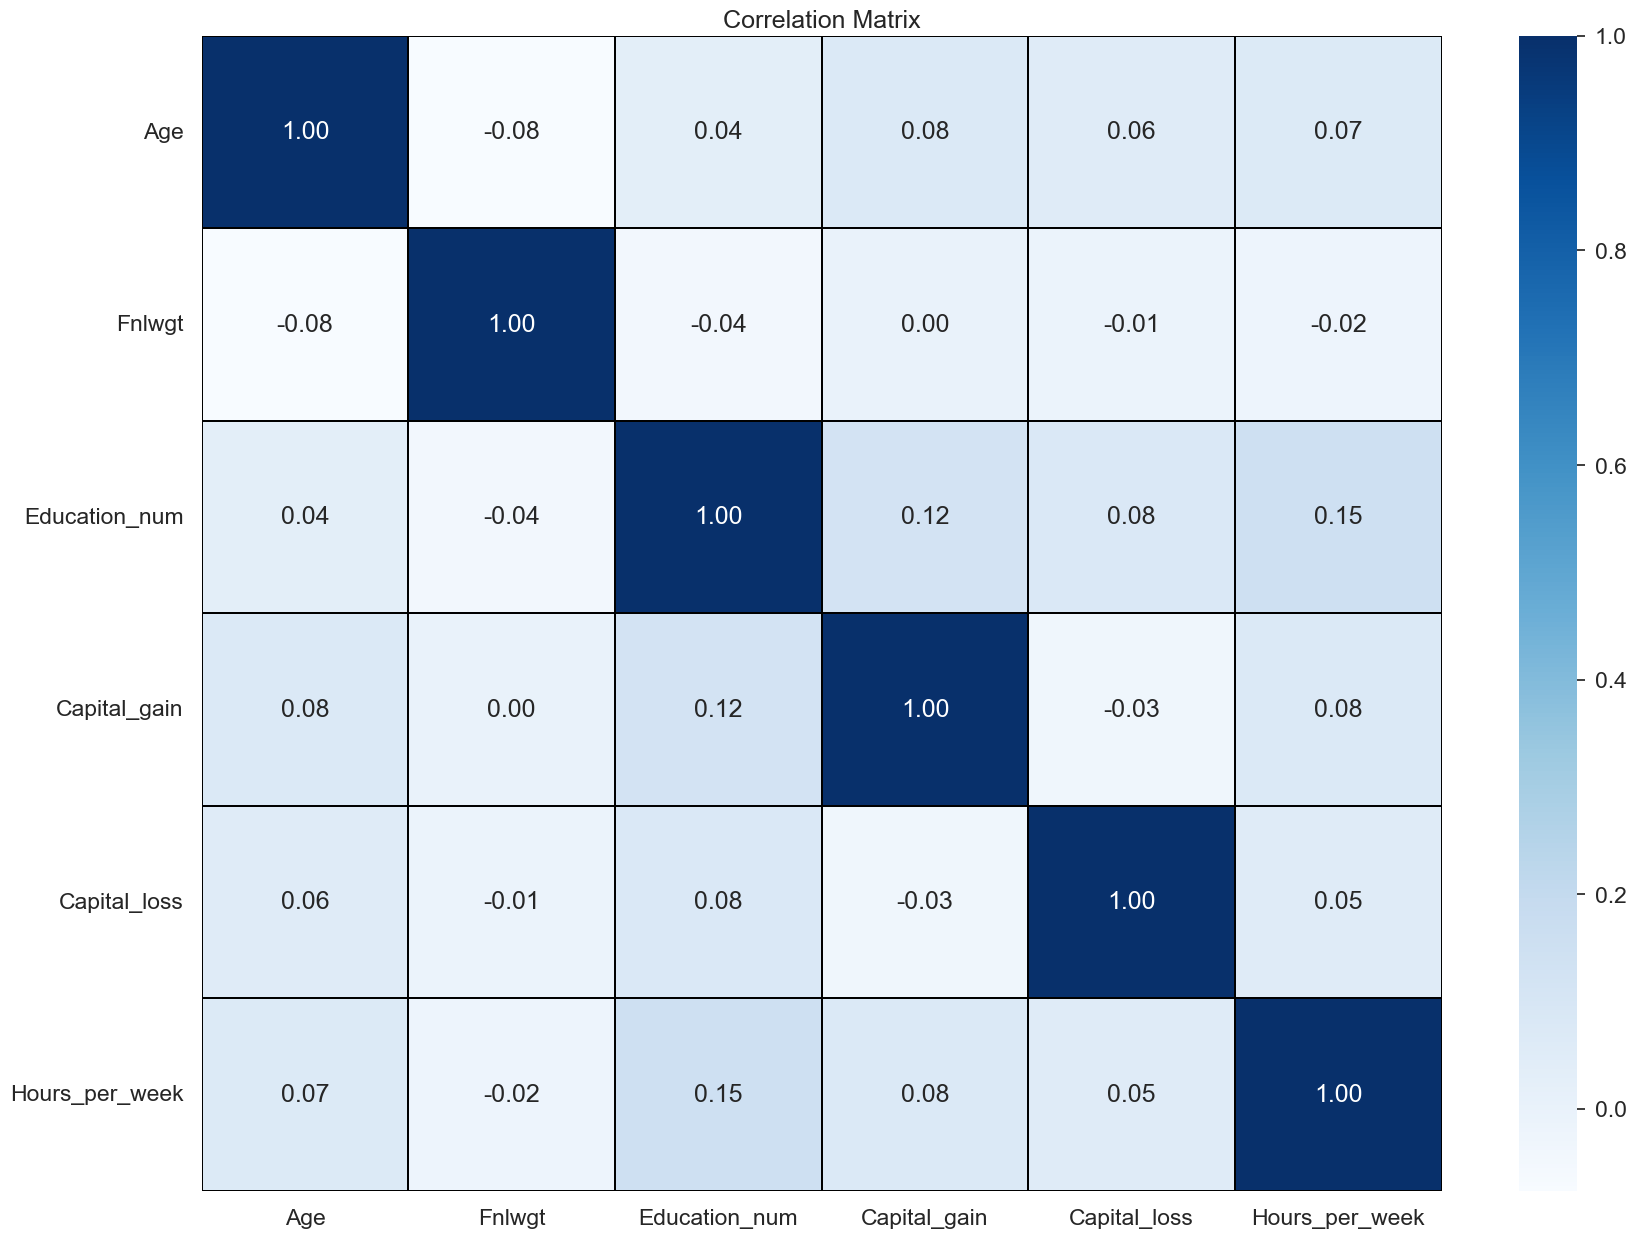

In [173]:
sns.set(font_scale=1.5)  

# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(cor, linewidths = 0.1, fmt = ".2f", linecolor = 'black', cmap='Blues', annot=True)
plt.yticks(rotation = 0)
plt.title('Correlation Matrix')
plt.show()


In [177]:
df.dtypes

Age                  int64
Workclass         category
Fnlwgt               int64
Education         category
Education_num        int64
Marital_status    category
Occupation        category
Relationship      category
Race              category
Sex               category
Capital_gain         int64
Capital_loss         int64
Hours_per_week       int64
Native_country    category
Income               int64
Education_bk      category
dtype: object

In [178]:
from sklearn.preprocessing import LabelEncoder
temp_data = df.copy()
for col in temp_data.columns:
    if temp_data[col].dtypes == 'category':
        encoder = LabelEncoder()
        temp_data[col] = encoder.fit_transform(temp_data[col])
        
# Correated Features with target variable
print('\n--Correated Features with target variable--\n')
print(abs(temp_data.corrwith(temp_data['Income'])).sort_values(ascending=False)[1:])


--Correated Features with target variable--

Education_num     0.335299
Relationship      0.250955
Age               0.234039
Hours_per_week    0.229659
Capital_gain      0.223340
Sex               0.215984
Marital_status    0.199187
Capital_loss      0.150498
Education_bk      0.079361
Race              0.071855
Education         0.049462
Workclass         0.048639
Native_country    0.022792
Occupation        0.010649
Fnlwgt            0.009521
dtype: float64


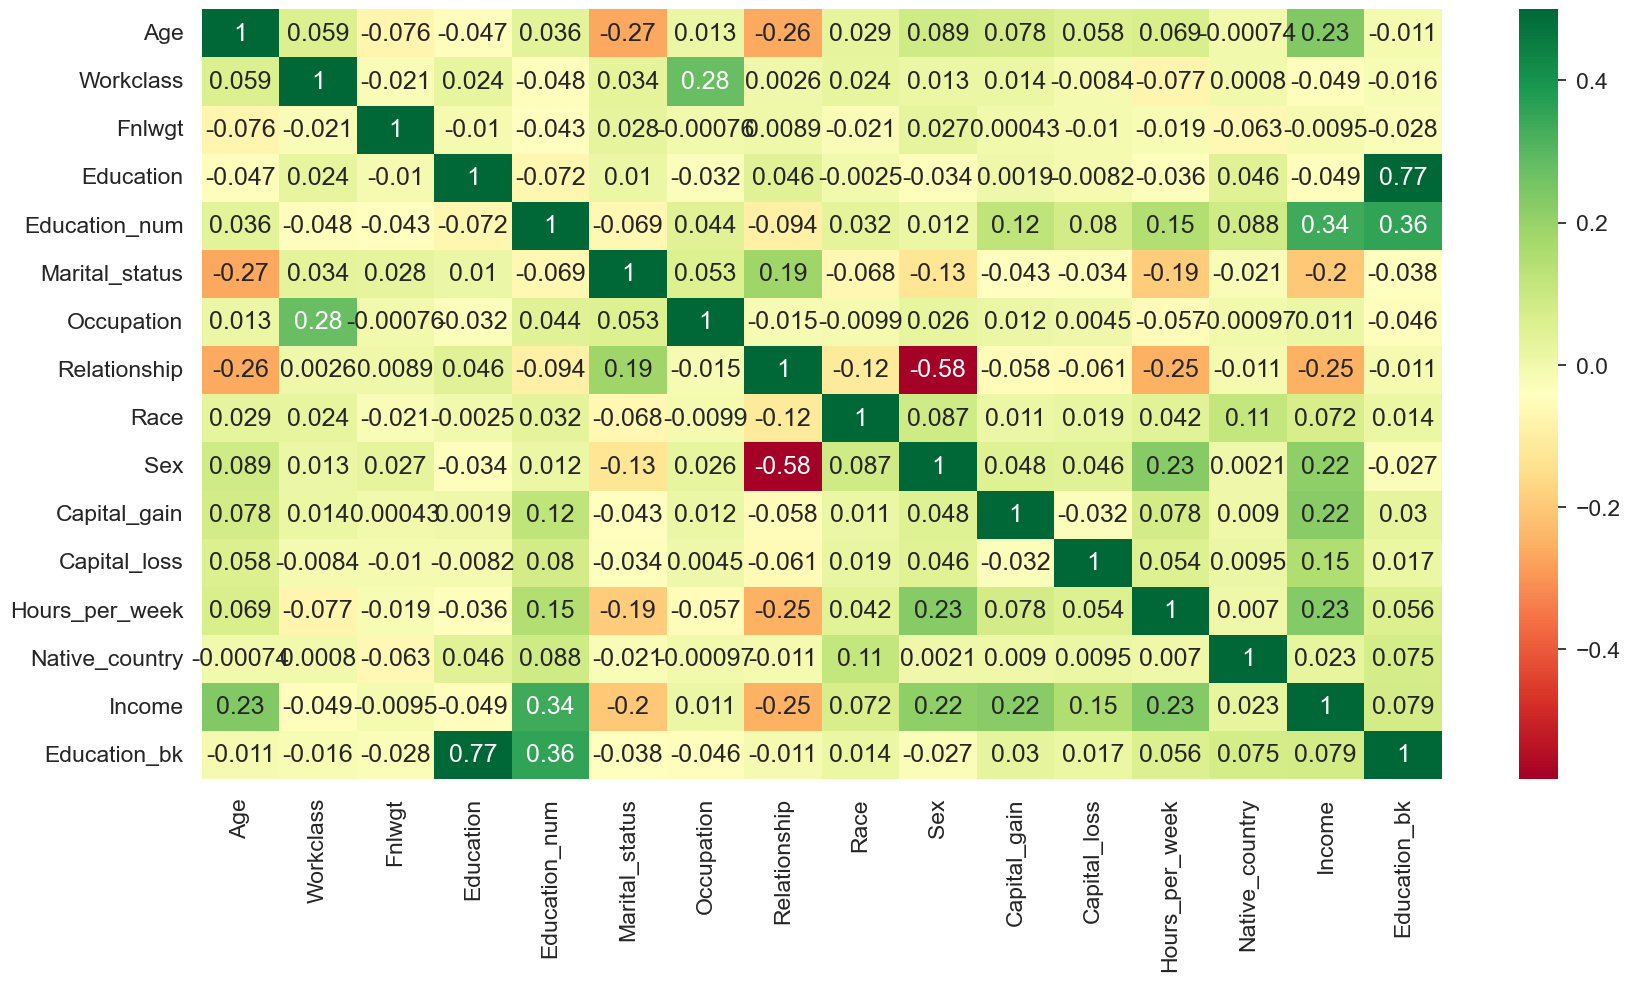

In [182]:
# Correlation Heatmap
plt.figure(figsize=[20,10])
sns.heatmap(temp_data.corr(), annot=True, cmap='RdYlGn', vmax=.5)
plt.show()

In [184]:
# checking the null values
missing_val = df.isnull().sum().to_frame("Null values")
missing_val

,Null values
Age,0
Workclass,0
Fnlwgt,0
Education,0
Education_num,0
Marital_status,0
Occupation,0
Relationship,0
Race,0
Sex,0


We dont have any missing values present.

In [185]:
#Encoding Categorical Variables
 # Checking the unique values of the categorical independent variables
for i, col in enumerate(categorical_col[:-1]):
    print(f"{i+1}.{col}:\n  {df[col].unique()}\n")

1.Workclass:
  ['Self-emp-not-inc', 'Private', 'State-gov', 'Federal-gov', 'Local-gov', 'Unknown', 'Self-emp-inc', 'Without-pay', 'Never-worked']
Categories (9, object): ['Private' < 'Self-emp-not-inc' < 'Local-gov' < 'Unknown' ... 'Self-emp-inc' < 'Federal-gov' < 'Without-pay' < 'Never-worked']

2.Education:
  ['Bachelors', 'HS-grad', 'Below High School', 'Masters', 'Some-college', 'Associate', 'Doctorate', 'Prof-school']
Categories (8, object): ['Doctorate' < 'Masters' < 'Bachelors' < 'Associate' < 'Prof-school' < 'Some-college' < 'HS-grad' < 'Below High School']

3.Marital_status:
  ['Married-civ-spouse', 'Divorced', 'Married-spouse-absent', 'Never-married', 'Separated', 'Married-AF-spouse', 'Widowed']
Categories (7, object): ['Married-civ-spouse' < 'Never-married' < 'Divorced' < 'Separated' < 'Widowed' < 'Married-spouse-absent' < 'Married-AF-spouse']

4.Occupation:
  ['Exec-managerial', 'Handlers-cleaners', 'Prof-specialty', 'Other-service', 'Adm-clerical', ..., 'Tech-support', 'Un

In [186]:
from sklearn.preprocessing import LabelEncoder

category_mappings = {}
encoding_col = categorical_col[:-1]

label_encoder = LabelEncoder()
for col in encoding_col:
    if col != 'Education':
        df[col] = df[col].astype('category')
    df[col] = label_encoder.fit_transform(df[col])
    
    # Store the mapping in a dictionary
    category_mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print(col,'\n', category_mappings[col],'\n')
    
display(df.head())
display(df.tail())

Workclass 
 {'Federal-gov': 0, 'Local-gov': 1, 'Never-worked': 2, 'Private': 3, 'Self-emp-inc': 4, 'Self-emp-not-inc': 5, 'State-gov': 6, 'Unknown': 7, 'Without-pay': 8} 

Education 
 {'Associate': 0, 'Bachelors': 1, 'Below High School': 2, 'Doctorate': 3, 'HS-grad': 4, 'Masters': 5, 'Prof-school': 6, 'Some-college': 7} 

Marital_status 
 {'Divorced': 0, 'Married-AF-spouse': 1, 'Married-civ-spouse': 2, 'Married-spouse-absent': 3, 'Never-married': 4, 'Separated': 5, 'Widowed': 6} 

Occupation 
 {'Adm-clerical': 0, 'Armed-Forces': 1, 'Craft-repair': 2, 'Exec-managerial': 3, 'Farming-fishing': 4, 'Handlers-cleaners': 5, 'Machine-op-inspct': 6, 'Other-service': 7, 'Priv-house-serv': 8, 'Prof-specialty': 9, 'Protective-serv': 10, 'Sales': 11, 'Tech-support': 12, 'Transport-moving': 13, 'Unknown': 14} 

Relationship 
 {'Husband': 0, 'Not-in-family': 1, 'Other-relative': 2, 'Own-child': 3, 'Unmarried': 4, 'Wife': 5} 

Race 
 {'Amer-Indian-Eskimo': 0, 'Asian-Pac-Islander': 1, 'Black': 2, 'Othe

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Education_bk
0,50,5,83311,1,13,2,3,0,4,1,0,0,13,38,0,Bachelors
1,38,3,215646,4,9,0,5,1,4,1,0,0,40,38,0,HS-grad
2,53,3,234721,2,7,2,5,0,2,1,0,0,40,38,0,11th
3,28,3,338409,1,13,2,9,5,2,0,0,0,40,4,0,Bachelors
4,37,3,284582,5,14,2,3,5,4,0,0,0,40,38,0,Masters


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Education_bk
32555,27,3,257302,0,12,2,12,5,4,0,0,0,38,38,0,Assoc-acdm
32556,40,3,154374,4,9,2,6,0,4,1,0,0,40,38,1,HS-grad
32557,58,3,151910,4,9,6,0,4,4,0,0,0,40,38,0,HS-grad
32558,22,3,201490,4,9,4,0,3,4,1,0,0,20,38,0,HS-grad
32559,52,4,287927,4,9,2,3,5,4,0,15024,0,40,38,1,HS-grad


In [189]:
#Dropping the Education_bk column as we no longer need it
df.drop('Education_bk',axis=1,inplace=True)

In [190]:
#Removing Outliers
# Detect outliers with zscore method
from scipy.stats import zscore

z = np.abs(zscore(df))
z


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0.836961,1.176073,1.008703,1.173217,1.134817,0.405890,0.790625,0.900122,0.393692,0.703036,0.145969,0.216747,2.222450,0.257441,0.563389
1,0.042934,0.224436,0.245008,0.134529,0.420646,1.733664,0.328636,0.277868,0.393692,0.703036,0.145969,0.216747,0.035664,0.257441,0.563389
2,1.056935,0.224436,0.425720,0.737302,1.198377,0.405890,0.328636,0.900122,1.962450,0.703036,0.145969,0.216747,0.035664,0.257441,0.563389
3,0.776180,0.224436,1.408036,1.173217,1.134817,0.405890,0.595341,2.211146,1.962450,1.422403,0.145969,0.216747,0.035664,5.351918,0.563389
4,0.116259,0.224436,0.898091,0.570444,1.523683,0.405890,0.790625,2.211146,0.393692,1.422403,0.145969,0.216747,0.035664,0.257441,0.563389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0.849505,0.224436,0.639647,1.609132,0.745951,0.405890,1.288324,2.211146,0.393692,1.422403,0.145969,0.216747,0.197648,0.257441,0.563389
32556,0.103715,0.224436,0.335469,0.134529,0.420646,0.405890,0.097642,0.900122,0.393692,0.703036,0.145969,0.216747,0.035664,0.257441,1.774973
32557,1.423558,0.224436,0.358812,0.134529,0.420646,2.249657,1.483608,1.588892,0.393692,1.422403,0.145969,0.216747,0.035664,0.257441,0.563389
32558,1.216128,0.224436,0.110897,0.134529,0.420646,0.921884,1.483608,0.966639,0.393692,0.703036,0.145969,0.216747,1.655506,0.257441,0.563389


In [191]:
# threshold = 3.55
df_new = df[(z<3.55).all(axis=1)]
df_new

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,1,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,4,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,2,7,2,5,0,2,1,0,0,40,38,0
4,37,3,284582,5,14,2,3,5,4,0,0,0,40,38,0
5,49,3,160187,2,5,3,7,1,2,0,0,0,16,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,0,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,154374,4,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,151910,4,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,201490,4,9,4,0,3,4,1,0,0,20,38,0


In [271]:
df_process = df_new.copy()
df_process

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,1,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,4,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,2,7,2,5,0,2,1,0,0,40,38,0
4,37,3,284582,5,14,2,3,5,4,0,0,0,40,38,0
5,49,3,160187,2,5,3,7,1,2,0,0,0,16,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,0,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,154374,4,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,151910,4,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,201490,4,9,4,0,3,4,1,0,0,20,38,0


In [193]:
# Checking the skewness in the data
df_skew = df_process.skew().sort_values(ascending=False).to_frame("Skew")
df_skew


,Skew
Capital_loss,15.251618
Capital_gain,5.101216
Income,1.320279
Relationship,0.756126
Fnlwgt,0.749048
Workclass,0.735637
Age,0.529204
Occupation,0.131573
Education,0.060512
Marital_status,-0.038203


In [194]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Regressor Algorithims
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

#Classification Algorithims
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [195]:
# Removing skewness using yeo-johnson method to get better prediction
features =['Capital_loss','Capital_gain','Income','Relationship','Fnlwgt','Workclass','Age','Occupation','Education','Marital_status','Sex','Hours_per_week','Education_num','Race','Native_country']

scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [197]:
df_process[features] = scaler.fit_transform(df_process[features].values)
df_process[features].head()

,Capital_loss,Capital_gain,Income,Relationship,Fnlwgt,Workclass,Age,Occupation,Education,Marital_status,Sex,Hours_per_week,Education_num,Race,Native_country
0,-0.071156,-0.296767,-0.538118,-1.107513,-1.115698,1.162678,0.911531,-0.688698,-1.192290,-0.390834,0.711227,-2.184460,1.209512,0.395003,0.128308
1,-0.071156,-0.296767,-0.538118,0.106925,0.409140,-0.169880,0.123304,-0.185142,0.203955,-1.770465,0.711227,-0.030151,-0.460231,0.395003,0.128308
2,-0.071156,-0.296767,-0.538118,-1.107513,0.584167,-0.169880,1.083687,-0.185142,-0.682093,-0.390834,0.711227,-0.030151,-1.217237,-2.539535,0.128308
4,-0.071156,-0.296767,-0.538118,1.550404,1.011054,-0.169880,0.048680,-0.688698,0.604674,-0.390834,-1.406022,-0.030151,1.655336,0.395003,0.128308
5,-0.071156,-0.296767,-0.538118,0.106925,-0.148573,-0.169880,0.852237,0.256068,-0.682093,0.264659,-1.406022,-1.968146,-1.911621,-2.539535,-3.455662


In [198]:
# Checking the skewness in the data
df_skew = df_process.skew().sort_values(ascending=False).to_frame("Skew")
df_skew


,Skew
Capital_loss,13.983268
Capital_gain,3.073033
Income,1.320279
Native_country,0.326853
Hours_per_week,0.151500
Workclass,0.136629
Relationship,0.109706
Education_num,0.030697
Age,-0.014596
Fnlwgt,-0.023117


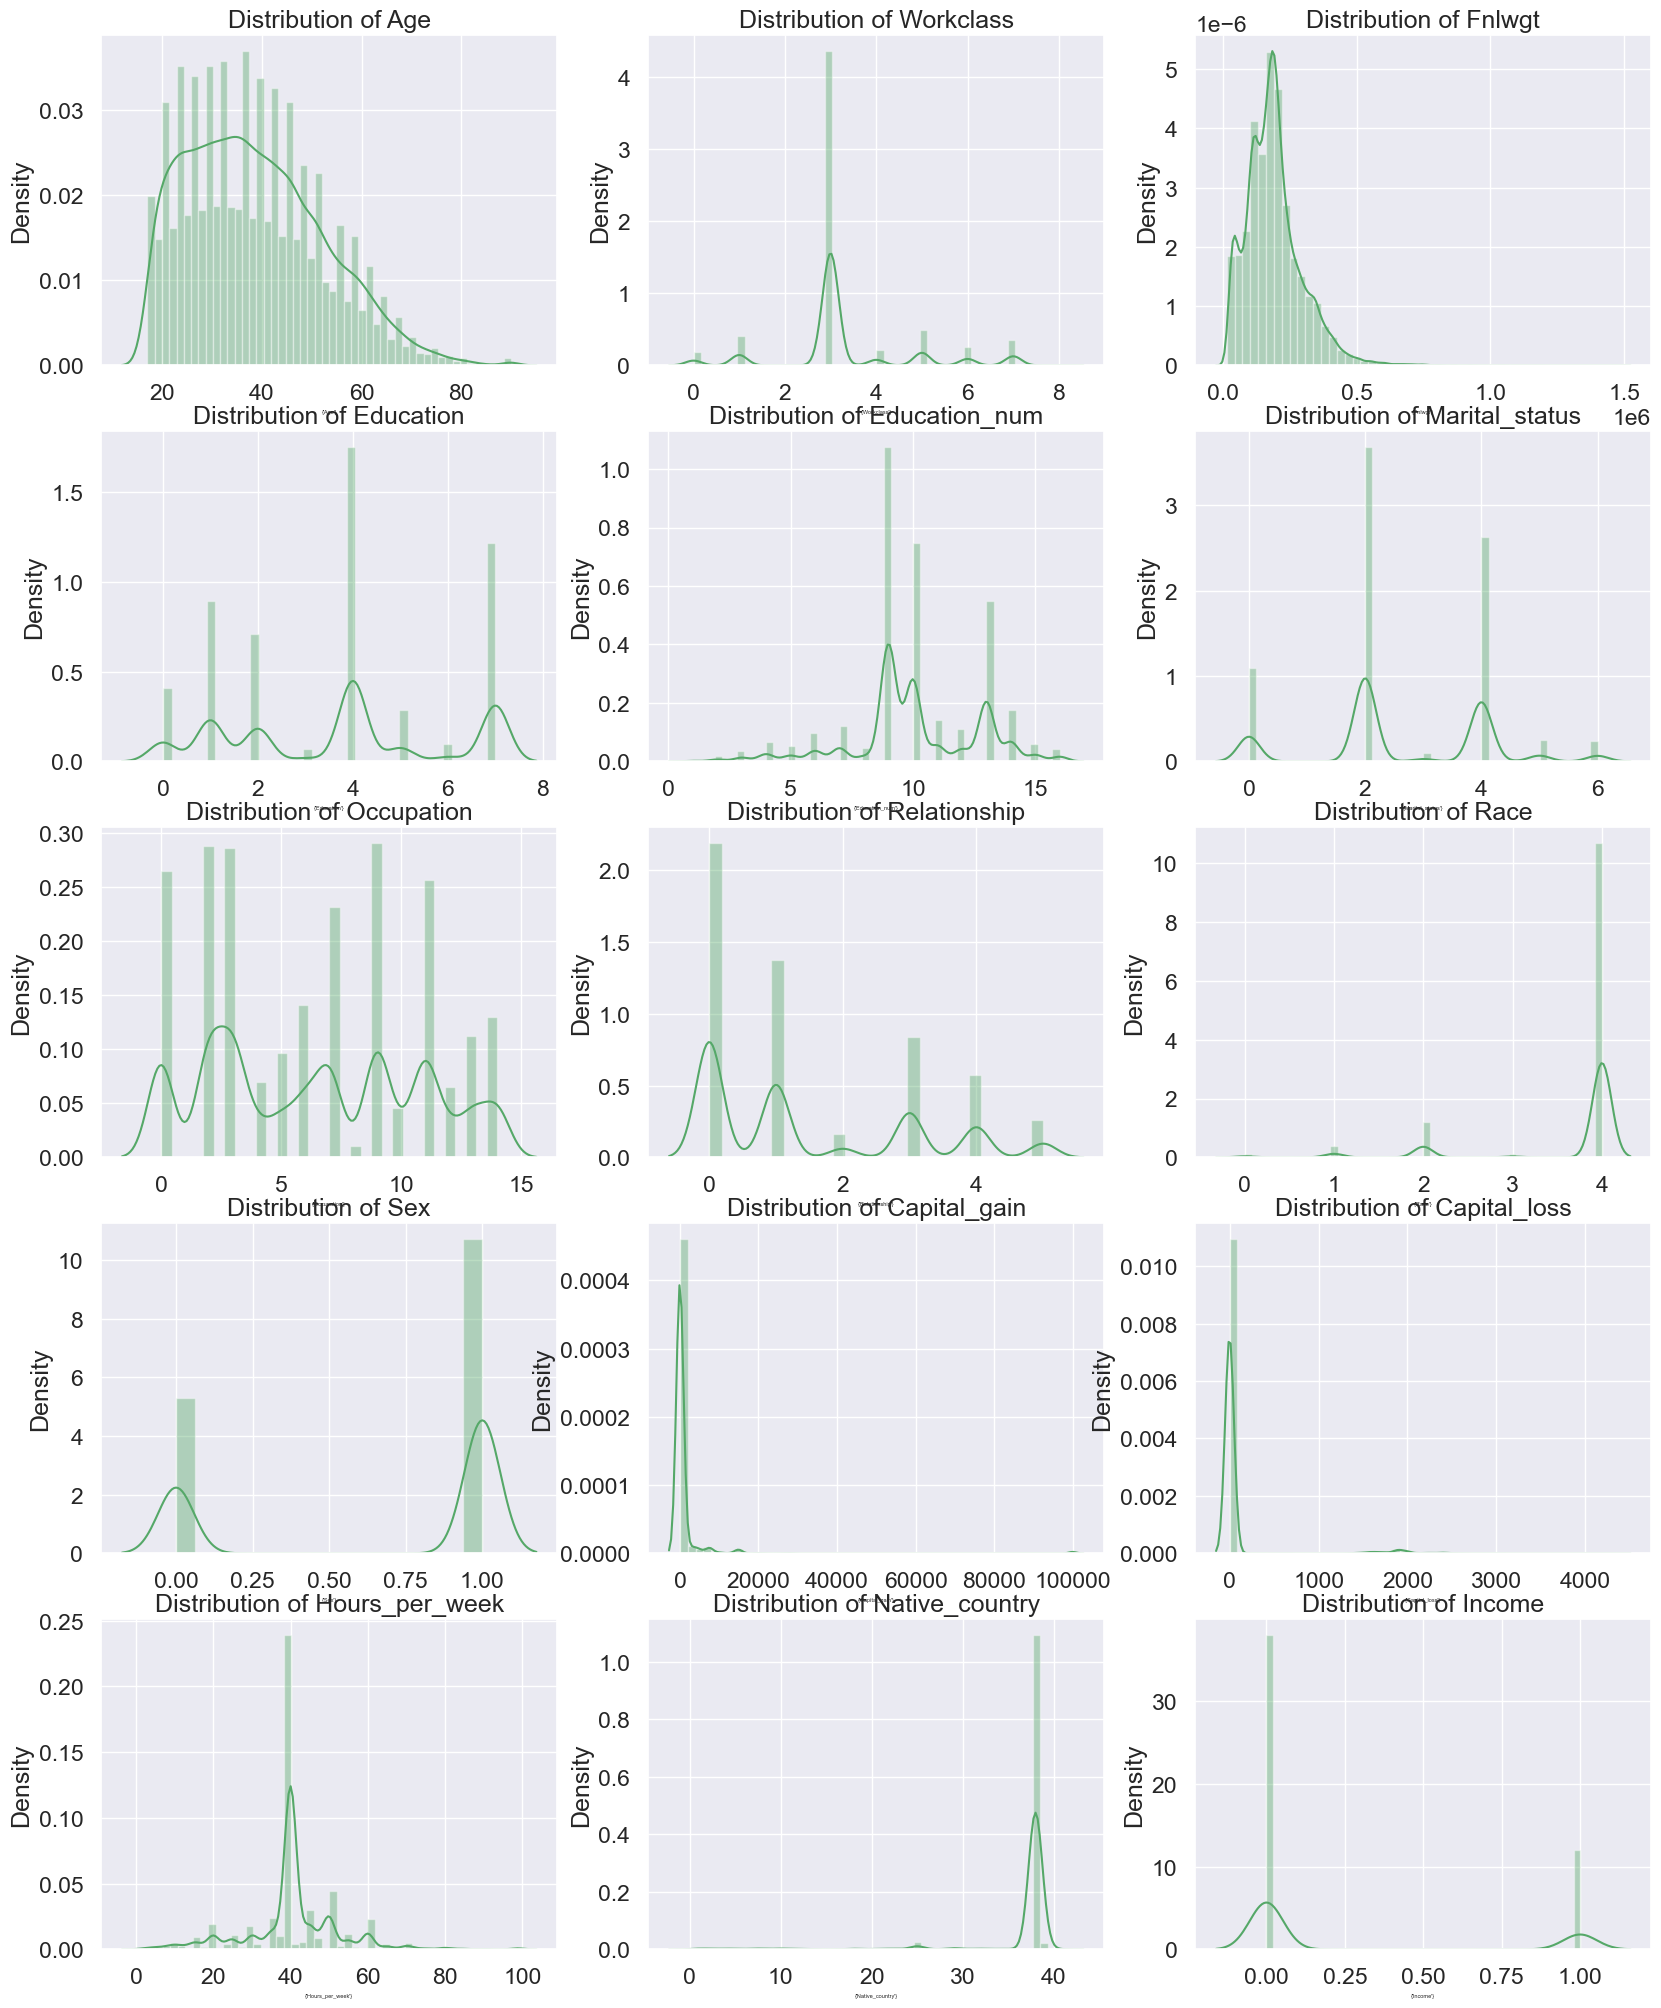

In [217]:
plotnumber=1
plt.figure(figsize=(20, 30))
for column in df_process:
    if plotnumber<=15:
       
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(df[column],color='g')
        plt.xlabel({column},fontsize=4)
        plt.title(f"Distribution of {column}")
    plotnumber+=1
plt.show()

We can observe that the distribution is normal.

In [272]:
df_process['Income'].dtype

dtype('int64')

In [273]:
#Feature Scaling using Standard Scalarisation
# Separating the independent and target variables into x and y 
x = df_process.drop('Income', axis=1)
y = df_process['Income']

print(f"Feature Dimension = {x.shape}")
print(f"Label Dimension = {y.shape}")

Feature Dimension = (29379, 14)
Label Dimension = (29379,)


In [255]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling the data 
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

display(x.head())

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.911531,1.162678,-1.115698,-1.192290,1.209512,-0.390834,-0.688698,-1.107513,0.395003,0.711227,-0.296767,-0.071156,-2.184460,0.128308
1,0.123304,-0.169880,0.409140,0.203955,-0.460231,-1.770465,-0.185142,0.106925,0.395003,0.711227,-0.296767,-0.071156,-0.030151,0.128308
2,1.083687,-0.169880,0.584167,-0.682093,-1.217237,-0.390834,-0.185142,-1.107513,-2.539535,0.711227,-0.296767,-0.071156,-0.030151,0.128308
3,0.048680,-0.169880,1.011054,0.604674,1.655336,-0.390834,-0.688698,1.550404,0.395003,-1.406022,-0.296767,-0.071156,-0.030151,0.128308
4,0.852237,-0.169880,-0.148573,-0.682093,-1.911621,0.264659,0.256068,0.106925,-2.539535,-1.406022,-0.296767,-0.071156,-1.968146,-3.455662


In [256]:
#Multicolinearity Analysis and feature selection
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

,Features,VIF values
7,Relationship,1.911609
9,Sex,1.634055
0,Age,1.270318
5,Marital_status,1.175987
12,Hours_per_week,1.138466
4,Education_num,1.081074
6,Occupation,1.073631
1,Workclass,1.072974
8,Race,1.038785
10,Capital_gain,1.032124


We can observe that the VIF Values are less than 10, so there is no multicolinearity existense. We can go ahead with the model building.

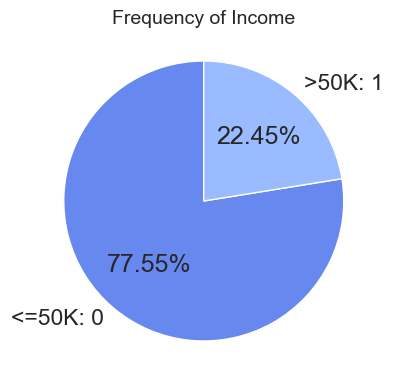

In [257]:
#Balancing the Dataset.
# Count the frequencies of target
target_counts = y.value_counts()

# Create a pie plot
sns.set_palette('coolwarm')
plt.figure(figsize=(5, 4))
plt.pie(target_counts, labels=['<=50K: 0', '>50K: 1'], autopct='%1.2f%%', startangle=90)

plt.title("Frequency of Income", size=14, y=1.05)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [276]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1, y1 = SM.fit_resample(x, y)

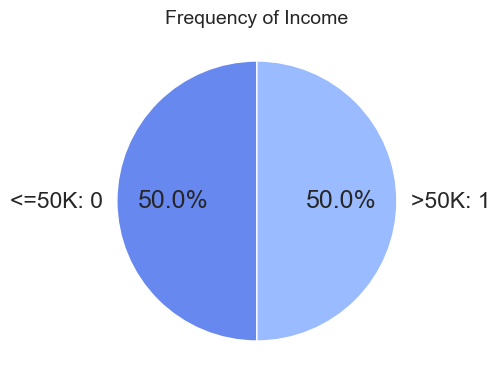

In [277]:
# Count the frequencies of target
target_counts = y1.value_counts()

# Create a pie plot
plt.figure(figsize=(5, 4))
plt.pie(target_counts, labels=['<=50K: 0', '>50K: 1'], autopct='%1.1f%%', startangle=90)

plt.title("Frequency of Income", size=14, y=1.05)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [278]:
X = x1
Y = y1

In [261]:

#Finding the best Random state
def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return [best_random_state, best_acc]

In [274]:
df_process['Income'].dtype

dtype('int64')

In [282]:
from sklearn.ensemble import RandomForestClassifier

In [283]:
%%time
# Build the model

model = RandomForestClassifier()
random_state, acc = find_best_random_state(model, X, Y) 
print(f"Best accuracy is {round(acc,4)} at random_state {random_state}")

Best accuracy is 0.8994 at random_state 187
CPU times: user 6min 11s, sys: 2.02 s, total: 6min 13s
Wall time: 6min 14s


In [284]:
#Creating the train Split test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)

x_train shape:  (31894, 14)
x_test shape:   (13670, 14)


In [285]:
#Classification Algorithm
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold



In [286]:
# Functions 
def calc_accuracy(model, id_model):
    ''' Calculate the accuracy of the model. Return the accuracy, training accuracy, and the predicted values.'''
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    acc_train = model.score(x_train, y_train)
    
    print(f"\nModel: {id_model}")
    print(f"Confusion matrix: \n {confusion_matrix(y_test, y_pred)}")
    print(f"Classification report: \n {classification_report(y_test, y_pred)}" )
    print(f"Training Accuracy using {id_model} is {acc_train*100.0:.2f}%")
    print(f"The accuracy score using {id_model} is {round(acc*100.0, 2)}%")
    
    return [acc, acc_train, y_pred]

In [287]:
models = {'RandomForestClassifier' : RandomForestClassifier(), 
          'ExtraTreesClassifier': ExtraTreesClassifier(),
          'LogisticRegression': LogisticRegression(),
          'SVC': SVC(),
          'GradientBoostingClassifier': GradientBoostingClassifier(), 
          'AdaBoostClassifier': AdaBoostClassifier(), 
          'BaggingClassifier': BaggingClassifier()}

# Setting up for saving the results of each model
df_model_accuracy = pd.DataFrame(columns=['id','Model','Training Accuracy','Model Accuracy Score'])
y_pred = {}

In [295]:
%%time
id_model = 'RandomForestClassifier'
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
model = models[id_model]


# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

print("Cross_Validaton_Score",cross_val_score(RFC,X,Y,cv=5).mean())


Model: RandomForestClassifier
Confusion matrix: 
 [[6211  693]
 [ 674 6092]]
Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      6904
           1       0.90      0.90      0.90      6766

    accuracy                           0.90     13670
   macro avg       0.90      0.90      0.90     13670
weighted avg       0.90      0.90      0.90     13670

Training Accuracy using RandomForestClassifier is 100.00%
The accuracy score using RandomForestClassifier is 90.0%

Model: RandomForestClassifier
Confusion matrix: 
 [[6185  719]
 [ 678 6088]]
Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      6904
           1       0.89      0.90      0.90      6766

    accuracy                           0.90     13670
   macro avg       0.90      0.90      0.90     13670
weighted avg       0.90      0.90      0.90     13670

Training Accuracy using R

In [296]:
%%time
id_model = 'ExtraTreesClassifier'
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
model = models[id_model]


# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

print("Cross_Validaton_Score",cross_val_score(ETC,X,Y,cv=5).mean())


Model: ExtraTreesClassifier
Confusion matrix: 
 [[6148  756]
 [ 672 6094]]
Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.89      0.90      6904
           1       0.89      0.90      0.90      6766

    accuracy                           0.90     13670
   macro avg       0.90      0.90      0.90     13670
weighted avg       0.90      0.90      0.90     13670

Training Accuracy using ExtraTreesClassifier is 100.00%
The accuracy score using ExtraTreesClassifier is 89.55%
Cross_Validaton_Score 0.8797525667150335
CPU times: user 11.6 s, sys: 150 ms, total: 11.8 s
Wall time: 11.8 s


In [297]:
%%time

id_model = 'LogisticRegression'
LR=LogisticRegression()
LR.fit(x_train,y_train)
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

print("Cross_Validaton_Score",cross_val_score(LR,X,Y,cv=5).mean())


Model: LogisticRegression
Confusion matrix: 
 [[4788 2116]
 [2110 4656]]
Classification report: 
               precision    recall  f1-score   support

           0       0.69      0.69      0.69      6904
           1       0.69      0.69      0.69      6766

    accuracy                           0.69     13670
   macro avg       0.69      0.69      0.69     13670
weighted avg       0.69      0.69      0.69     13670

Training Accuracy using LogisticRegression is 68.35%
The accuracy score using LogisticRegression is 69.09%
Cross_Validaton_Score 0.6263294498582667
CPU times: user 5.82 s, sys: 622 ms, total: 6.44 s
Wall time: 836 ms


In [303]:
%%time

id_model ='SVC'
#SV= SVC()
#SV.fit(x_train,y_train)

model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

#print("Cross_Validaton_Score",cross_val_score(SV,X,Y,cv=5).mean())



Model: SVC
Confusion matrix: 
 [[6822   82]
 [5413 1353]]
Classification report: 
               precision    recall  f1-score   support

           0       0.56      0.99      0.71      6904
           1       0.94      0.20      0.33      6766

    accuracy                           0.60     13670
   macro avg       0.75      0.59      0.52     13670
weighted avg       0.75      0.60      0.52     13670

Training Accuracy using SVC is 58.86%
The accuracy score using SVC is 59.8%
CPU times: user 53.3 s, sys: 149 ms, total: 53.4 s
Wall time: 53.6 s


In [304]:
%%time

id_model = 'GradientBoostingClassifier'
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

print("Cross_Validaton_Score",cross_val_score(GBC,X,Y,cv=5).mean())


Model: GradientBoostingClassifier
Confusion matrix: 
 [[6058  846]
 [ 739 6027]]
Classification report: 
               precision    recall  f1-score   support

           0       0.89      0.88      0.88      6904
           1       0.88      0.89      0.88      6766

    accuracy                           0.88     13670
   macro avg       0.88      0.88      0.88     13670
weighted avg       0.88      0.88      0.88     13670

Training Accuracy using GradientBoostingClassifier is 87.98%
The accuracy score using GradientBoostingClassifier is 88.41%
Cross_Validaton_Score 0.8680764880935463
CPU times: user 17.8 s, sys: 13.2 ms, total: 17.8 s
Wall time: 17.8 s


In [305]:
%%time

id_model = 'BaggingClassifier'
BC=BaggingClassifier()
BC.fit(x_train,y_train)
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

print("Cross_Validaton_Score",cross_val_score(BC,X,Y,cv=5).mean())


Model: BaggingClassifier
Confusion matrix: 
 [[6232  672]
 [ 870 5896]]
Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      6904
           1       0.90      0.87      0.88      6766

    accuracy                           0.89     13670
   macro avg       0.89      0.89      0.89     13670
weighted avg       0.89      0.89      0.89     13670

Training Accuracy using BaggingClassifier is 99.15%
The accuracy score using BaggingClassifier is 88.72%
Cross_Validaton_Score 0.8717200254303903
CPU times: user 4.52 s, sys: 31.2 ms, total: 4.55 s
Wall time: 4.56 s


After applying various model,cross-validation technique we observe the better cross-validation score is for Random Forest Classifier and the difference with accuracy score is 0.0151 confirming as follows:

Random Forest Classifier is our best Model

In [306]:
#HyperParameter Tuning
random_state

187

In [307]:
model =RandomForestClassifier()
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [312]:
# RandomforestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
             'bootstrap':[True, False],
             'criterion':['gini', 'entropy'],
             'min_samples_split': np.arange(2, 11),  # Vary the minimum samples required to split
             'min_samples_leaf': np.arange(1, 5),  # Vary the minimum samples required for a leaf
             'n_estimators': np.arange(50, 310, 10),  # Vary the number of trees
             'max_depth': [None] + list(np.arange(20, 110, 10)),  # Vary the maximum depth of trees
             'random_state': [random_state, 50, 500, 1000],
             'n_jobs': [-1, -1, 1]
             }

# Build the model 
model = RandomForestClassifier()

In [313]:
%%time 

# Perform search with cross validation
# Create RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_grid, 
                                   n_iter=10, scoring='accuracy', cv=3, 
                                   random_state=random_state, n_jobs=-1)
# Fit the model 
random_search.fit(x_train, y_train)

CPU times: user 6.97 s, sys: 178 ms, total: 7.15 s
Wall time: 14.9 s


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'min_samples_leaf': array([1, 2, 3, 4]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300]),
                                        'n_jobs': [-1, -1, 1],
                                        'random_state': [187, 50, 500, 1000]},
                   random_state=187, scoring='accuracy')

In [314]:
# Get the best hyperparameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters for RandomForestClassifier model:")
display(best_params)

Best Parameters for RandomForestClassifier model:


{'random_state': 500,
 'n_jobs': -1,
 'n_estimators': 210,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_depth': 60,
 'criterion': 'entropy',
 'bootstrap': False}

In [315]:
best_model

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=60,
                       min_samples_leaf=2, min_samples_split=10,
                       n_estimators=210, n_jobs=-1, random_state=500)

In [316]:
# Create the model with the best parameters
best_model = RandomForestClassifier (criterion = 'gini',
                                   bootstrap = False,
                                   max_depth = 40,
                                   max_features = 'sqrt',
                                   min_samples_split = 3,
                                   min_samples_leaf = 1,
                                   n_estimators = 300,
                                   n_jobs = -1, 
                                   random_state = 1000)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the accuracy
acc = accuracy_score(y_test, y_pred)
print(f"accuracy_score: {round(acc*100,2)}%")

accuracy_score: 89.74%


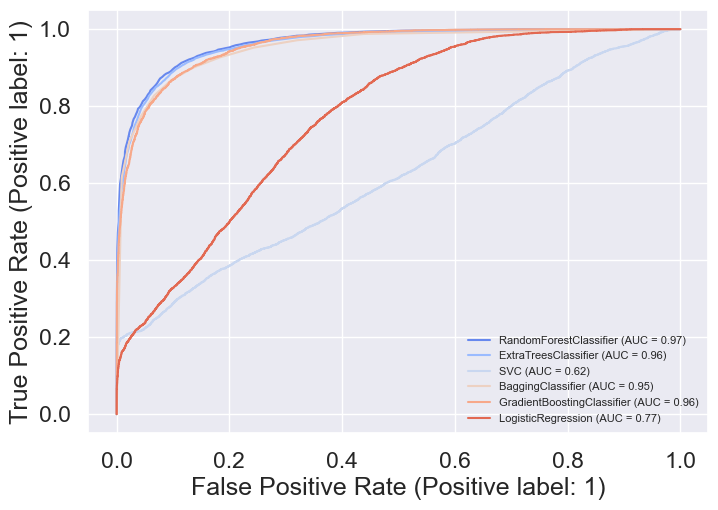

In [317]:
#Plotting ROC and AUC for the models 
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots()

metrics.RocCurveDisplay.from_estimator(RFC,x_test,y_test,ax=ax)
metrics.RocCurveDisplay.from_estimator(ETC, x_test, y_test,ax=ax)    
metrics.RocCurveDisplay.from_estimator(SVC, x_test, y_test,ax=ax)
metrics.RocCurveDisplay.from_estimator(BC, x_test, y_test,ax=ax)
metrics.RocCurveDisplay.from_estimator(GBC, x_test, y_test,ax=ax)
metrics.RocCurveDisplay.from_estimator(LR,x_test,y_test,ax=ax)


plt.legend(prop={'size':8}, loc='lower right')
plt.show()

In [318]:
# Saving the model using .pkl
import joblib
joblib.dump(best_model, "census_income_model.pkl")

['census_income_model.pkl']

In [319]:
# Lets load the saved model and get the predictions
model = joblib.load("census_income_model.pkl")

# Prediction
prediction = model.predict(x_test)

# Accuracy score of the prediction with the model selected
print(f"Accuracy score: {accuracy_score(y_test, prediction)*100:.3f} %")

# Dataframe to compare the predicted values vs the original values
df_result = pd.DataFrame()
df_result['Predicted'] = prediction
df_result['Original'] = np.array(y_test)
df_result.T


Accuracy score: 89.737 %


,0,1,2,3,4,5,6,7,8,9,...,13660,13661,13662,13663,13664,13665,13666,13667,13668,13669
Predicted,0,1,1,0,0,1,0,1,0,1,...,1,1,1,1,1,0,0,1,1,0
Original,1,0,1,0,0,1,0,1,0,1,...,0,0,1,1,1,0,0,1,1,0


These are the predicted values in the fraction of the dataset for testing to compare the prediction with accuracy of 89.737%